<div class="alert alert-block alert-info">
    <h1> Telecom Churn Case Study </h1>
</div>

## Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Preparation](#section3)<br>
     3.1 [Understanding the Dataset](#section301)<br>
     3.2 [Derive Features](#section302)<br>
     3.3 [Filter high-value customers](#section303)<br> 3.4 [Tag churners and remove attributes of the churn phase](#section304)<br> 
4. [Visualising the Data](#section4)<br>
5. [Outlier Treatment and Deriving New Features](#section5)<br>
6. [Splitting the Data into Training and Testing Sets](#section6)<br>
7. [PCA](#section7)<br>
8. [Model Building with Default Parameters ](#section8)<br>  8.1 [Logistic Regression](#section801)<br>
     8.2 [RandomForest](#section802)<br>
     8.3 [SVM](#section803)<br>
     8.4 [Model Comparison](#section804)<br>   
9. [Improving Model with Hyperparameter Tuning ](#section9)<br>  8.1 [RandomForest](#section901)<br>
     8.2 [XGBOOST](#section902)<br>
     8.3 [SVM](#section903)<br>
     8.4 [Model Comparison](#section904)<br> 
10. [Building an Interpretable Model](#section10)<br> 
11. [Feature Importance](#section11)<br> 
12. [Conclusion](#section12)<br> 

<a id=section1></a>
## 1. Problem Statement

"__In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.__" <br>

 

* __Essentially, the telecom companies wants:__ <br/>

 - To reduce customer churn, and to do that they `need to predict which customers are at high risk of churn.`


    
    
The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA) on House Property Data__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

<br>

* __Exploratory Data Analysis__ <br/>
Understand the data related to Property or Houses by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 
    
    
   

<a id=section2></a>
## 2. Data Loading and Description (Telecom Churn Data)
<img  src="https://www.displayr.com/wp-content/uploads/2017/07/customer-churn-edit.jpeg" >



- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
- The first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Importing packages         

In [1]:
#Importing Packages
import numpy as np                                  # Implements milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                               # Provides a high level interface for drawing attractive and informative statistical graphics
import math
%matplotlib inline
sns.set()

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from sklearn import metrics

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)  #Setting option to display max columns
pd.set_option('display.max_rows', None)  #Setting option to display max columns



#### Importing the Dataset

In [2]:
#Read the dataset
telecom=pd.read_csv('telecom_churn_data.csv')

<a id=section3></a>
## 3. Data Preparation

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- We will __derive new features__ and __filter high value customers__.
- Then the `churners` will be __tagged__ and __attributes will be removed__ from the `Churn` phase.
- In __preprocessing__ we will deal with erronous and missing values of columns. 

<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
telecom.shape                           # This will print the number of rows and columns of the Data Frame

(99999, 226)

Telecom Dataset has __99999 rows__ and __226 columns.__

In [4]:
telecom.columns                        # This will print the column names 

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
# As we have too many Columns setting pandas to display all the columns of the DataFrame
pd.pandas.set_option('display.max_columns',None)

In [6]:
telecom.head()                        # This will print the first 5 rows of the DataFrame

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
telecom.info(verbose=True)                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

Looks like the date columns are object types, so it needs to be converted to date type

In [8]:
#Checking on ID field
print("Unique Id in the dataset: ", len(telecom.mobile_number))

Unique Id in the dataset:  99999


<a id=section302></a>
### 3.2 Derive Features

In [9]:
#Lets look at all the recharge (RECH) columns in the dataset
rech_cols = telecom.columns[telecom.columns.str.contains('rech')]
rech_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [10]:
#Check the missing values in recharge columns
#Find Attributes with Missing Percentage
missing=telecom[rech_cols].isnull().sum()
missing_pct=np.round((telecom[rech_cols].isnull().sum()/telecom[rech_cols].isnull().count())*100,decimals=2)
print ('List of Attributes and their missing Percentage(%)')
print ('---------------------------------------')
print(missing_pct)

List of Attributes and their missing Percentage(%)
---------------------------------------
total_rech_num_6             0.00
total_rech_num_7             0.00
total_rech_num_8             0.00
total_rech_num_9             0.00
total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
total_rech_amt_9             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
max_rech_amt_8               0.00
max_rech_amt_9               0.00
date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
date_of_last_rech_9          4.76
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8          

- From the above output we can see that there are many attributes having more than __74%__ of null values. 
- Missing values for some of the above columns could be because there was no recharge done, so it would be safe to replace the missing values with `0`

In [11]:
telecom[rech_cols].describe().transpose()  #Checking the details of the features

,count,mean,std,min,25%,50%,75%,max
total_rech_num_6,99999.0,7.558806,7.078405,0.0,3.0,6.0,9.0,307.0
total_rech_num_7,99999.0,7.700367,7.070422,0.0,3.0,6.0,10.0,138.0
total_rech_num_8,99999.0,7.212912,7.203753,0.0,3.0,5.0,9.0,196.0
total_rech_num_9,99999.0,6.893019,7.096261,0.0,3.0,5.0,9.0,131.0
total_rech_amt_6,99999.0,327.514615,398.019701,0.0,109.0,230.0,437.5,35190.0
total_rech_amt_7,99999.0,322.962970,408.114237,0.0,100.0,220.0,428.0,40335.0
total_rech_amt_8,99999.0,324.157122,416.540455,0.0,90.0,225.0,434.5,45320.0
total_rech_amt_9,99999.0,303.345673,404.588583,0.0,52.0,200.0,415.0,37235.0
max_rech_amt_6,99999.0,104.637486,120.614894,0.0,30.0,110.0,120.0,4010.0
max_rech_amt_7,99999.0,104.752398,124.523970,0.0,30.0,110.0,128.0,4010.0


- Some of the features looks heavily right skewed like `tot_rech_amt, av_rech_amt_data, max_rech_amt, max_rech_data` and  more.

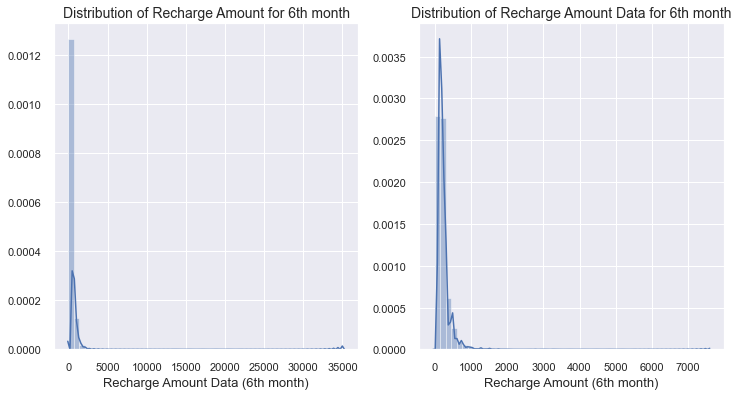

In [12]:
#Check Distribution of RECH Columns
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(telecom['total_rech_amt_6'], ax=ax[0])
ax[0].set_title('Distribution of Recharge Amount for 6th month',fontsize=14)
ax[0].set_xlabel('Recharge Amount Data (6th month)',fontsize=13)

sns.distplot(telecom['av_rech_amt_data_6'], ax=ax[1])
ax[1].set_title('Distribution of Recharge Amount Data for 6th month',fontsize=14)
ax[1].set_xlabel('Recharge Amount (6th month)',fontsize=13)
plt.show()

In [13]:
#Lets take a look at total recharge amount and total recharge data and average recharge amount data fields
telecom[['total_rech_num_6','total_rech_amt_6','total_rech_data_6','av_rech_amt_data_6']].head()

,total_rech_num_6,total_rech_amt_6,total_rech_data_6,av_rech_amt_data_6
0,4,362,1.0,252.0
1,4,74,NaN,NaN
2,5,168,NaN,NaN
3,10,230,NaN,NaN
4,5,196,1.0,56.0


- Looks like Total Recharge Amount for data can be calculated by multiplying `total_rech_data * av_rech_amt_data`

In [14]:
#Check the missing values count for total_rech_data and av_rech_amt_data columns
cols_to_replace = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                  'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
telecom[cols_to_replace].isnull().sum()

total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64

In [15]:
#Fill the missing value with '0' for total_rech_data and av_rech_amt_data columns
telecom[cols_to_replace]=telecom[cols_to_replace].fillna(0.0)

In [16]:
#Check the data after replace
telecom[cols_to_replace].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0
1,0.0,1.0,2.0,0.0,0.0,154.0,50.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


In [17]:
#Check missing values again
telecom[cols_to_replace].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [18]:
#Create new feature total_rech_amt_data
telecom['total_rech_amt_data_6']=telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7']=telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']
telecom['total_rech_amt_data_8']=telecom['total_rech_data_8']*telecom['av_rech_amt_data_8']
telecom['total_rech_amt_data_9']=telecom['total_rech_data_9']*telecom['av_rech_amt_data_9']

In [19]:
telecom[['total_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_6',
        'total_rech_amt_data_7','total_rech_data_7','av_rech_amt_data_7',]].sample(5)  #Check data to confirm the change


,total_rech_amt_data_6,total_rech_data_6,av_rech_amt_data_6,total_rech_amt_data_7,total_rech_data_7,av_rech_amt_data_7
28743,96.0,2.0,48.0,92.0,2.0,46.0
57754,0.0,0.0,0.0,0.0,0.0,0.0
4474,632.0,4.0,158.0,1225.0,7.0,175.0
20992,0.0,0.0,0.0,0.0,0.0,0.0
65868,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Create Total Recharge amount (Data + Amount) for Good Phase 
#The above feature will be used to define High Value Customers

telecom['total_rech_amount_good_phase']=telecom['total_rech_amt_data_6'] + telecom['total_rech_amt_data_7'] \
                                        + telecom['total_rech_amt_6'] \
                                        + telecom['total_rech_amt_7']


In [21]:
#Lets take a look at the data
telecom[['total_rech_amount_good_phase','total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_6',
        'total_rech_amt_7']].head()

,total_rech_amount_good_phase,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6,total_rech_amt_7
0,1118.0,252.0,252.0,362,252
1,612.0,0.0,154.0,74,384
2,483.0,0.0,0.0,168,315
3,540.0,0.0,0.0,230,310
4,602.0,56.0,0.0,196,350


<a id=section303></a>
### 3.3 Filter high-value customers

Definition of High Value Customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [22]:
# Calculate the average of the total recharge amount in good phase
telecom['avg_rech_amount_good_phase'] = telecom['total_rech_amount_good_phase']/2

In [23]:
# Find out the 70th percentile of the average recharge
telecom.avg_rech_amount_good_phase.quantile(0.7)

478.0

70th percentile of the average recharge amount in the first two months (the good phase) is `478`

In [24]:
# Create new data frame with high value customer filter
telecom_high_val_cust = telecom[telecom['avg_rech_amount_good_phase'] >= telecom.avg_rech_amount_good_phase.quantile(0.7)]
telecom_high_val_cust.shape

(30001, 232)

<a id=section304></a>
### 3.4 Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
 - total_ic_mou_9
 - total_og_mou_9
 - vol_2g_mb_9
 - vol_3g_mb_9

In [25]:
#Check above columns data
telecom_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [26]:
#Check any missing values
telecom_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [27]:
#Apply Churn
telecom_high_val_cust['churn']=np.where((telecom_high_val_cust['total_ic_mou_9']==0.0) & (telecom_high_val_cust['total_og_mou_9']==0.0)
                                       & (telecom_high_val_cust['vol_2g_mb_9']==0.0) & (telecom_high_val_cust['vol_3g_mb_9']==0.0
                                        ),1,0)


In [28]:
#Check Churn percentage
(telecom_high_val_cust[telecom_high_val_cust['churn']==1].shape[0]/telecom_high_val_cust.shape[0])*100

8.136395453484884

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [29]:
#Create list of attributes which needs to be dropped after tagging Churners
drop_attr=telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('_9')]
drop_attr

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [30]:
#Check Shape before dropping
telecom_high_val_cust.shape
#Drop Attributes
telecom_high_val_cust=telecom_high_val_cust.drop(drop_attr,axis=1)
#Check Shape after dropping
telecom_high_val_cust.shape

(30001, 178)

In [31]:
#Check 4th month column
drop_attr=telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('sep')]
drop_attr

Index(['sep_vbc_3g'], dtype='object')

In [32]:
#Check Shape before dropping
telecom_high_val_cust.shape
#Drop Attributes
telecom_high_val_cust=telecom_high_val_cust.drop(drop_attr,axis=1)
#Check Shape after dropping
telecom_high_val_cust.shape

(30001, 177)

<a id=section305></a>
### 3.5 Data Preprocessing

- Convert columns to appropriate formats
- Handle Missing Values
- Remove unnecessary columns

In [33]:
#Lets start by removing unnecessary columns which does not add value to EDA or modeling
#Find the Cardinality
for x in telecom_high_val_cust.columns:
    print ('The feature is {} and number of categories are {}'.format(x,telecom_high_val_cust[x].nunique()))

The feature is mobile_number and number of categories are 30001
The feature is circle_id and number of categories are 1
The feature is loc_og_t2o_mou and number of categories are 1
The feature is std_og_t2o_mou and number of categories are 1
The feature is loc_ic_t2o_mou and number of categories are 1
The feature is last_date_of_month_6 and number of categories are 1
The feature is last_date_of_month_7 and number of categories are 1
The feature is last_date_of_month_8 and number of categories are 1
The feature is arpu_6 and number of categories are 29072
The feature is arpu_7 and number of categories are 29084
The feature is arpu_8 and number of categories are 28073
The feature is onnet_mou_6 and number of categories are 16890
The feature is onnet_mou_7 and number of categories are 16987
The feature is onnet_mou_8 and number of categories are 15872
The feature is offnet_mou_6 and number of categories are 21220
The feature is offnet_mou_7 and number of categories are 21263
The feature i

The feature is arpu_3g_8 and number of categories are 6010
The feature is arpu_2g_6 and number of categories are 5776
The feature is arpu_2g_7 and number of categories are 5420
The feature is arpu_2g_8 and number of categories are 4778
The feature is night_pck_user_6 and number of categories are 2
The feature is night_pck_user_7 and number of categories are 2
The feature is night_pck_user_8 and number of categories are 2
The feature is monthly_2g_6 and number of categories are 5
The feature is monthly_2g_7 and number of categories are 6
The feature is monthly_2g_8 and number of categories are 6
The feature is sachet_2g_6 and number of categories are 31
The feature is sachet_2g_7 and number of categories are 35
The feature is sachet_2g_8 and number of categories are 34
The feature is monthly_3g_6 and number of categories are 12
The feature is monthly_3g_7 and number of categories are 15
The feature is monthly_3g_8 and number of categories are 12
The feature is sachet_3g_6 and number of 

The columns with number of unique categories `1` are of no use , therefore can be dropped

In [34]:
#Find list of columns with only 1 category
uniq_cols=[]
for x in telecom_high_val_cust.columns:
    if (telecom_high_val_cust[x].nunique()==1):
        uniq_cols.append(x)
print (uniq_cols)
print('Number of columns dropped here  = ', len(uniq_cols))

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
Number of columns dropped here  =  13


In [35]:
#Check shape before dropping
print ('Shape before Dropping: ', telecom_high_val_cust.shape)

#Drop Columns
telecom_high_val_cust=telecom_high_val_cust.drop(uniq_cols,axis=1)

#Check shape after dropping
print ('Shape after Dropping: ', telecom_high_val_cust.shape)


Shape before Dropping:  (30001, 177)
Shape after Dropping:  (30001, 164)


Let's create 2 sets of data -- __Qualitative__ and __Quantitative__ features for our future analysis purposes

In [36]:
#Find the number of Numerical and Categorical Columns
num_col=[x for x in telecom_high_val_cust.columns if telecom_high_val_cust[x].dtypes != 'O']
print ('Total Number of Numerical Columns: ', len(num_col))
qual_col=[x for x in telecom_high_val_cust.columns if telecom_high_val_cust[x].dtypes == 'O']
print ('Total Number of Categorical Columns: ', len(qual_col))

Total Number of Numerical Columns:  158
Total Number of Categorical Columns:  6


In [37]:
#lets check Categorical columns
qual_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [38]:
telecom_high_val_cust[qual_col].head()    #Check Top records for qualitative columns

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


Looks like all are date fields and needs to be converted to datetime

In [39]:
#Convert to Datetime
for x in qual_col:
    telecom_high_val_cust[x] = pd.to_datetime(telecom_high_val_cust[x],errors='coerce')

#Check the datatype
telecom_high_val_cust[qual_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       29928 non-null  datetime64[ns]
 1   date_of_last_rech_7       29903 non-null  datetime64[ns]
 2   date_of_last_rech_8       29418 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  16756 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  17057 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  15953 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 1.6 MB


In [40]:
#Check data
telecom_high_val_cust[qual_col].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


In [41]:
import datetime
last_date_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

telecom_high_val_cust["days_rech_left_6"]= (last_date_month_6 - telecom_high_val_cust.date_of_last_rech_6).astype('timedelta64[D]')
telecom_high_val_cust["days_rech_left_7"]= (last_date_month_7 - telecom_high_val_cust.date_of_last_rech_7).astype('timedelta64[D]')
telecom_high_val_cust["days_rech_left_8"] = (last_date_month_8 - telecom_high_val_cust.date_of_last_rech_8).astype('timedelta64[D]')


telecom_high_val_cust[['days_rech_left_6','days_rech_left_7','days_rech_left_8']].head()

,days_rech_left_6,days_rech_left_7,days_rech_left_8
0,9.0,15.0,23.0
7,3.0,6.0,5.0
8,5.0,0.0,1.0
21,0.0,0.0,0.0
23,12.0,24.0,7.0


In [42]:
#Check missing values for the above columns
telecom_high_val_cust[['days_rech_left_6','days_rech_left_7','days_rech_left_8']].isnull().sum()

days_rech_left_6     73
days_rech_left_7     98
days_rech_left_8    583
dtype: int64

In [43]:
#Fill missing values with median
telecom_high_val_cust['days_rech_left_6']=telecom_high_val_cust['days_rech_left_6'].fillna(telecom_high_val_cust['days_rech_left_6'].median())
telecom_high_val_cust['days_rech_left_7']=telecom_high_val_cust['days_rech_left_7'].fillna(telecom_high_val_cust['days_rech_left_7'].median())
telecom_high_val_cust['days_rech_left_8']=telecom_high_val_cust['days_rech_left_8'].fillna(telecom_high_val_cust['days_rech_left_8'].median())


In [44]:
#Check missing values for the above columns
telecom_high_val_cust[['days_rech_left_6','days_rech_left_7','days_rech_left_8']].isnull().sum()

days_rech_left_6    0
days_rech_left_7    0
days_rech_left_8    0
dtype: int64

In [45]:
#Find other Attributes with Missing Percentage
missing=telecom_high_val_cust.isnull().sum()
missing_pct=np.round((telecom_high_val_cust.isnull().sum()/telecom_high_val_cust.isnull().count())*100,decimals=2)
print ('List of Attributes and their missing Percentage(%)')
print ('---------------------------------------')
print(missing_pct[missing_pct>0])

List of Attributes and their missing Percentage(%)
---------------------------------------
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.82
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.82
loc_og_mou_7                 1.79
loc_og_mou_8             

- There are still lot of missing values for columns. Lets look at them below

In [46]:
#Lets look at max_rech_data
telecom_high_val_cust[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].head()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
0,252.0,252.0,252.0
7,NaN,NaN,NaN
8,NaN,154.0,23.0
21,NaN,NaN,NaN
23,NaN,179.0,179.0


- Looks like the value is missing when the recharge has not happened yet, so we can safely replace the values with `0`

In [47]:
#Replace max_rech_data column values with 0
telecom_high_val_cust[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_high_val_cust[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].fillna(0.0)


In [48]:
#Check the data again
telecom_high_val_cust[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].head()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
0,252.0,252.0,252.0
7,0.0,0.0,0.0
8,0.0,154.0,23.0
21,0.0,0.0,0.0
23,0.0,179.0,179.0


In [49]:
#Find all 2g|3g|data columns
telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('2g|3g|data')]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

In [50]:
#Lets look at 2g,3g and data field
telecom_high_val_cust[['total_rech_data_6','av_rech_amt_data_6','count_rech_2g_6','count_rech_3g_6','arpu_2g_6','arpu_3g_6']].head()


,total_rech_data_6,av_rech_amt_data_6,count_rech_2g_6,count_rech_3g_6,arpu_2g_6,arpu_3g_6
0,1.0,252.0,0.0,1.0,212.17,212.17
7,0.0,0.0,NaN,NaN,NaN,NaN
8,0.0,0.0,NaN,NaN,NaN,NaN
21,0.0,0.0,NaN,NaN,NaN,NaN
23,0.0,0.0,NaN,NaN,NaN,NaN


- Based on the data above, it looks like missing value represent either no recharge or revenue generated for the customer so we can safely replace the value with `0`

In [51]:
#Replace 2g,3g, arpu column values with 0
telecom_high_val_cust[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']] = telecom_high_val_cust[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']].fillna(0.0)
telecom_high_val_cust[['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']] = telecom_high_val_cust[['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']].fillna(0.0)
telecom_high_val_cust[['arpu_3g_6','arpu_3g_7','arpu_3g_8']] = telecom_high_val_cust[['arpu_3g_6','arpu_3g_7','arpu_3g_8']].fillna(0.0)
telecom_high_val_cust[['arpu_2g_6','arpu_2g_7','arpu_2g_8']] = telecom_high_val_cust[['arpu_2g_6','arpu_2g_7','arpu_2g_8']].fillna(0.0)



In [52]:
#Check the data after imputation
telecom_high_val_cust[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                      'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
0,0.0,0.0,0.0,1.0,1.0,1.0,212.17,212.17,212.17,212.17,212.17,212.17
7,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
8,0.0,2.0,3.0,0.0,0.0,0.0,0.00,0.00,19.83,0.00,0.00,0.00
21,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
23,0.0,0.0,0.0,0.0,2.0,2.0,0.00,306.57,197.27,0.00,301.78,150.67


In [53]:
#Lets look at night pack user and fbuser field
telecom_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].head()


,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,1.0,1.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,0.0,NaN,1.0,1.0
21,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,0.0,0.0,NaN,1.0,1.0


- Night pack user are special scheme to use during specific night hours only 
- Facebook User pack are special recharge packages for Service scheme to avail services of Facebook and similar social networking sites


In [54]:
special_package=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']


In [55]:
for x in special_package:
    print ('The feature is {} and categories are {}'.format(x,telecom_high_val_cust[x].unique()))

The feature is night_pck_user_6 and categories are [ 0. nan  1.]
The feature is night_pck_user_7 and categories are [ 0. nan  1.]
The feature is night_pck_user_8 and categories are [ 0. nan  1.]
The feature is fb_user_6 and categories are [ 1. nan  0.]
The feature is fb_user_7 and categories are [ 1. nan  0.]
The feature is fb_user_8 and categories are [ 1. nan  0.]


In [56]:
#Replace night pack user and fbuser column values with 0
telecom_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8']] = telecom_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8']].fillna(0.0)
telecom_high_val_cust[['fb_user_6','fb_user_7','fb_user_8']] = telecom_high_val_cust[['fb_user_6','fb_user_7','fb_user_8']].fillna(0.0)



In [57]:
#Check the data
telecom_high_val_cust[special_package].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0
21,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,1.0,1.0


In [58]:
#Find Attributes with Missing Percentage
missing=telecom_high_val_cust.isnull().sum()
missing_pct=np.round((telecom_high_val_cust.isnull().sum()/telecom_high_val_cust.isnull().count())*100,decimals=2)
print ('List of Attributes and their missing Percentage(%)')
print ('---------------------------------------')
print(missing_pct[missing_pct>0])

List of Attributes and their missing Percentage(%)
---------------------------------------
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.82
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.82
loc_og_mou_7                 1.79
loc_og_mou_8             

- Now we see a repeated pattern for missing values of 1.81, 1.79 and 3.91 for 6th, 7th and 8th month.
- The pattern identified suggest that the customer has not used outgoing/incoming/usage calls
- These values can be replaced with `0`

In [59]:
#Find mou/ig/og columns
mou_og_ig_cols=telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('mou_|ic_others|og_other')]

In [60]:
# Check number of columns
len(mou_og_ig_cols)

87

In [61]:
#Check Data
telecom_high_val_cust[mou_og_ig_cols].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
23,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,116.63,174.41,224.21,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06


In [62]:
#Replace all mou/ig/og missing values to 0
telecom_high_val_cust[mou_og_ig_cols] = telecom_high_val_cust[mou_og_ig_cols].fillna(0.0)


In [63]:
#Check Data again
telecom_high_val_cust[mou_og_ig_cols].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
23,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,116.63,174.41,224.21,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06


In [64]:
#Find Attributes with Missing Percentage
missing=telecom_high_val_cust.isnull().sum()
missing_pct=np.round((telecom_high_val_cust.isnull().sum()/telecom_high_val_cust.isnull().count())*100,decimals=2)
print ('List of Attributes and their missing Percentage(%)')
print ('---------------------------------------')
print(missing_pct[missing_pct>0])

List of Attributes and their missing Percentage(%)
---------------------------------------
date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.15
date_of_last_rech_data_7    43.15
date_of_last_rech_data_8    46.83
dtype: float64


-  Only Date columns are left with missing values

In [65]:
#looking at the date columns
telecom_high_val_cust[['date_of_last_rech_6','date_of_last_rech_data_6','date_of_last_rech_7','date_of_last_rech_data_7']].head()


,date_of_last_rech_6,date_of_last_rech_data_6,date_of_last_rech_7,date_of_last_rech_data_7
0,2014-06-21,2014-06-21,2014-07-16,2014-07-16
7,2014-06-27,NaT,2014-07-25,NaT
8,2014-06-25,NaT,2014-07-31,2014-07-31
21,2014-06-30,NaT,2014-07-31,NaT
23,2014-06-18,NaT,2014-07-07,2014-07-07


- It looks like the missing values are when the customer has not recharged
- Date columns will be anyhow dropped before model input
- We will leave the columns as of now as it is not going to affect our EDA

<a id=section4></a>
## 4 Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Here we will identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

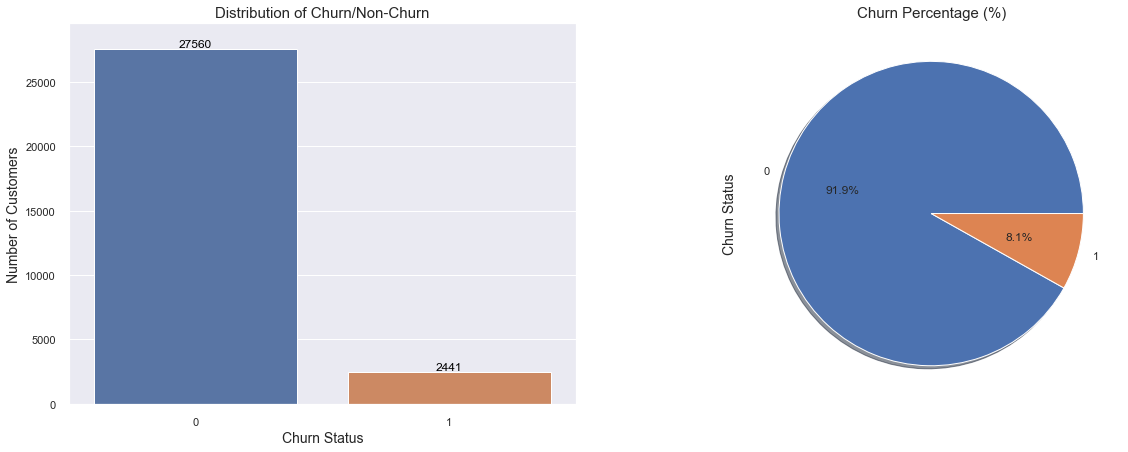

In [66]:
#Plot Distribution of Churn

f,ax = plt.subplots(1,2,figsize=(20,7))

sns.countplot(x="churn",data=telecom_high_val_cust,ax=ax[0])
ax[0].set_title('Distribution of Churn/Non-Churn', fontsize=15)
ax[0].set_ylabel('Number of Customers',fontsize=14)
ax[0].set_xlabel('Churn Status',fontsize=14)

# ylim max value to be set
y_max = telecom_high_val_cust['churn'].value_counts().max() 
ax[0].set_ylim([0, math.ceil(y_max)+2000])

# Iterate through the list of axes' patches
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#Plotting Pie Chart for Fully Paid and Charged off Loan Status
telecom_high_val_cust['churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Churn Percentage (%)', fontsize=15)
ax[1].set_ylabel('Churn Status',fontsize=14)

plt.show()

- There are `~92%` __Non-Churn__ High Value customers and `~8%` __Churn__ High Value Customers. 
- This also confirms that the __dataset is imbalanced__ as one class is far less than the other class.

In [67]:
# Define reusable function to plot boxplots
def plt_cat(itm_col):
    plt.figure(figsize= (20,6))
    #f,ax = plt.subplots(figsize= (20,6))
    
    i = 1
    j= len(itm_col)
    for x in itm_col:
        plt.subplot(1,j,i)
        g=sns.boxplot( x = telecom_high_val_cust["churn"], y = telecom_high_val_cust[x],showfliers=False)
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
        i += 1
        
    plt.show()

def prep_plt(itm_col,no_of_col):
    l_items=[]
    counter=0

    for x in itm_col:
        l_items.append(x)
        counter +=1
        if (counter == no_of_col):
            counter = 0
            plt_cat(l_items)
            l_items=[]

    if (counter!= 0):
        plt_cat(l_items)

### Analysis on Recharge Amount

In [68]:
#Find Recharge Amount Fields
rech_amt = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains("rech_amt")]
rech_amt

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

In [69]:
telecom_high_val_cust[rech_amt].isnull().sum() #Check Missing values

total_rech_amt_6         0
total_rech_amt_7         0
total_rech_amt_8         0
max_rech_amt_6           0
max_rech_amt_7           0
max_rech_amt_8           0
av_rech_amt_data_6       0
av_rech_amt_data_7       0
av_rech_amt_data_8       0
total_rech_amt_data_6    0
total_rech_amt_data_7    0
total_rech_amt_data_8    0
dtype: int64

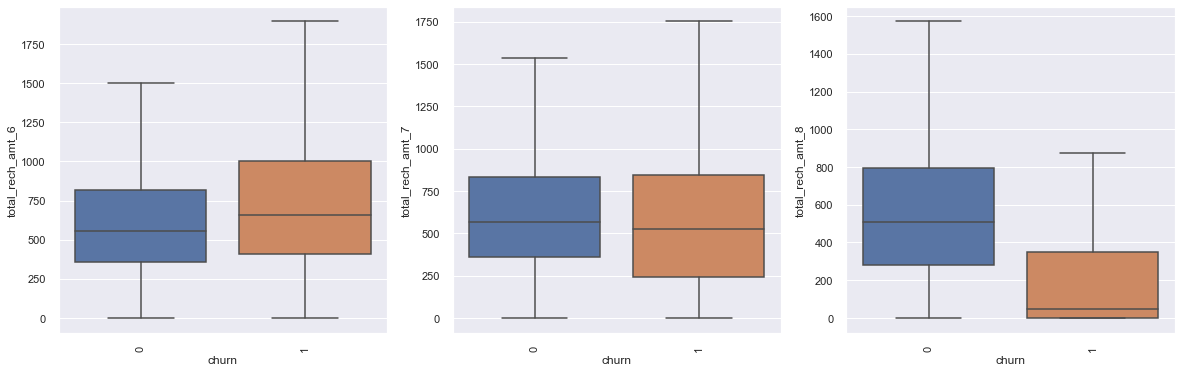

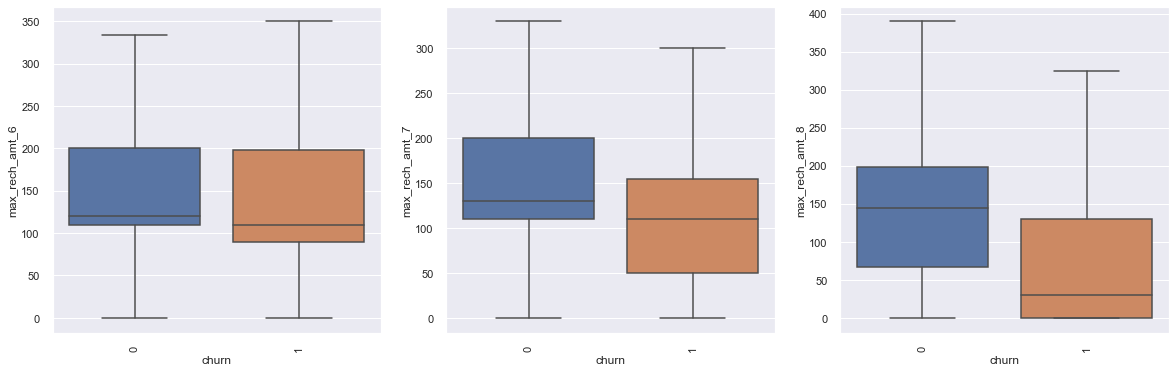

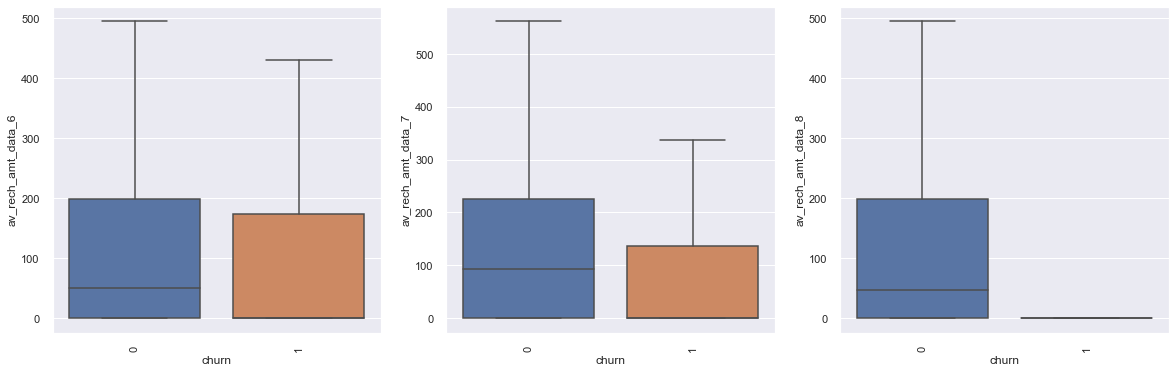

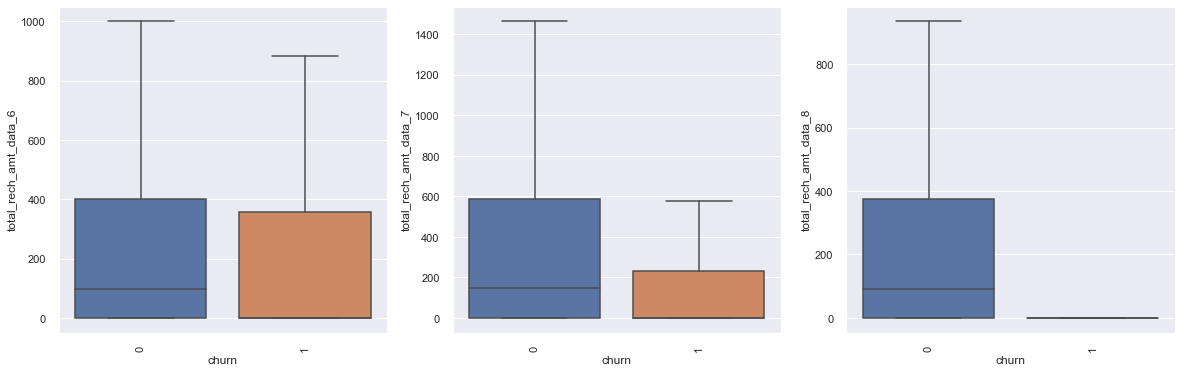

In [70]:
#Boxplot Recharge amount on Churn Status
prep_plt(rech_amt,3)

__Drop in all recharge amount fields is noticed for churned customers in the 8th Month (Action Phase)__

### Analysis on 2g/3g attributes

In [71]:
#Find 2g  Fields
attr_2g = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains("2g")]
attr_2g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8'],
      dtype='object')

In [72]:
#Lets remove few attributes for easier analysis
list1 = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('sachet|vbc|arpu')]
list1

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

In [73]:
#Remove attributes
attr_2g_upd=[x for x in attr_2g if x not in list1]
attr_2g_upd

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8']

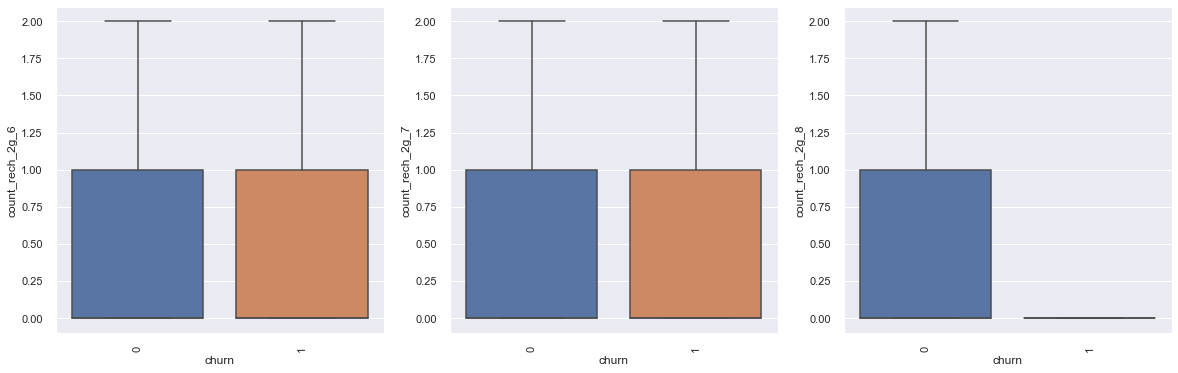

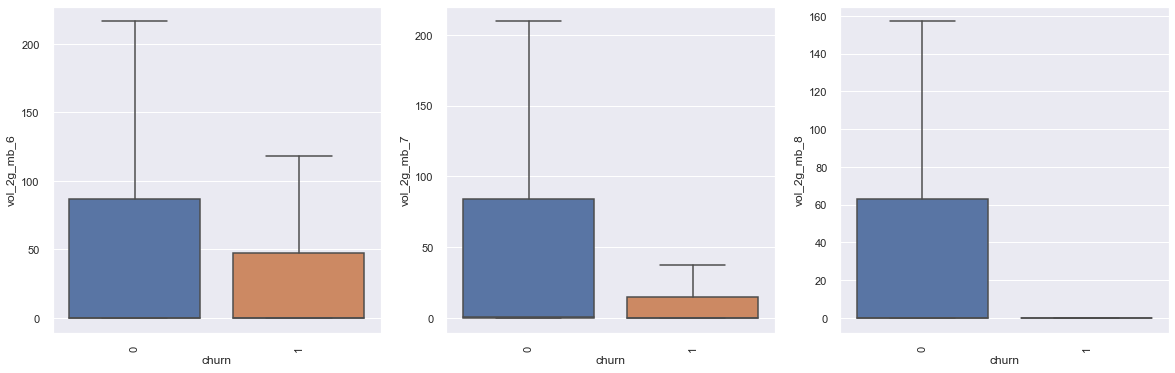

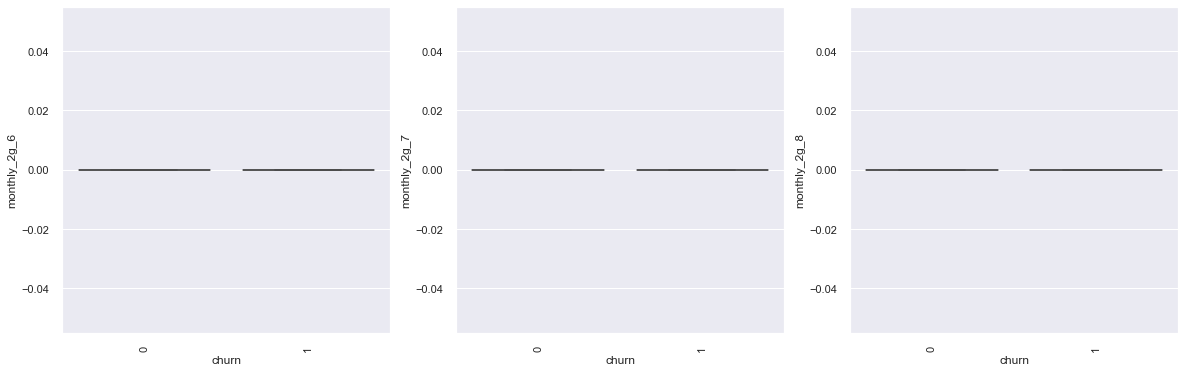

In [74]:
#Boxplot 2g attributes on Churn Status
prep_plt(attr_2g_upd,3)

- __count_rech_2g and vol_2g_mb__ have significant drop in 8th month for churned customers
- __vol_2g_mb__ is throughout higher for non-churned customer
- __monthly_2g__ doesnt seem to provide any information 


In [75]:
#Find 3g  Fields
attr_3g = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains("3g")]
attr_3g

Index(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

In [76]:
#Remove attributes
attr_3g_upd=[x for x in attr_3g if x not in list1]
attr_3g_upd

['count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

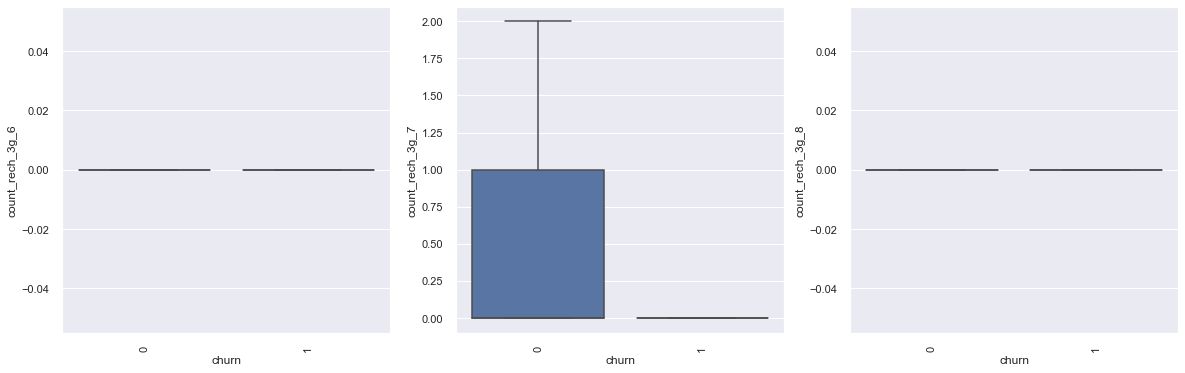

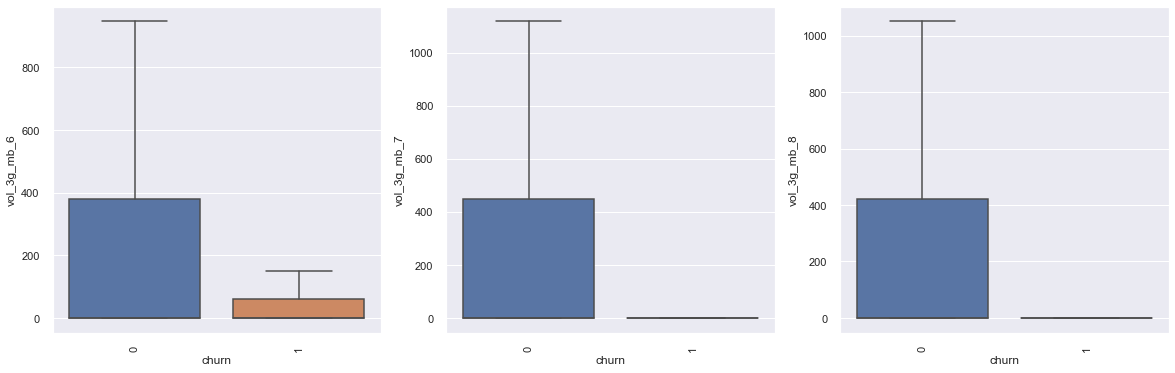

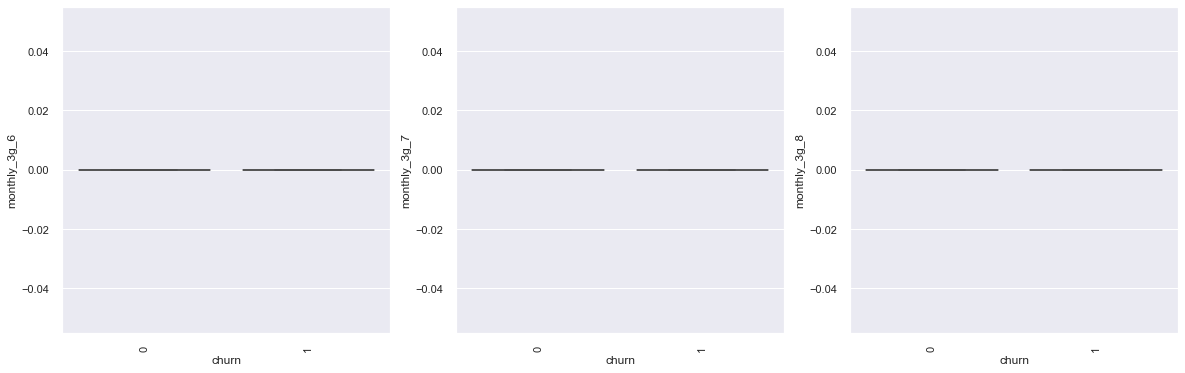

In [77]:
#Boxplot 3g attributes on Churn Status
prep_plt(attr_3g_upd,3)

- __vol_3g_mb__ have significant drop in 8th month for churned customers
- __vol_3g_mb__ is throughout higher for non-churned customer
- __monthly_3g and count_rech_3g__ doesnt seem to provide any information

### Analysis on average revenue per user

In [78]:
#Find arpu  Fields
arpu = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains("arpu")]
arpu

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

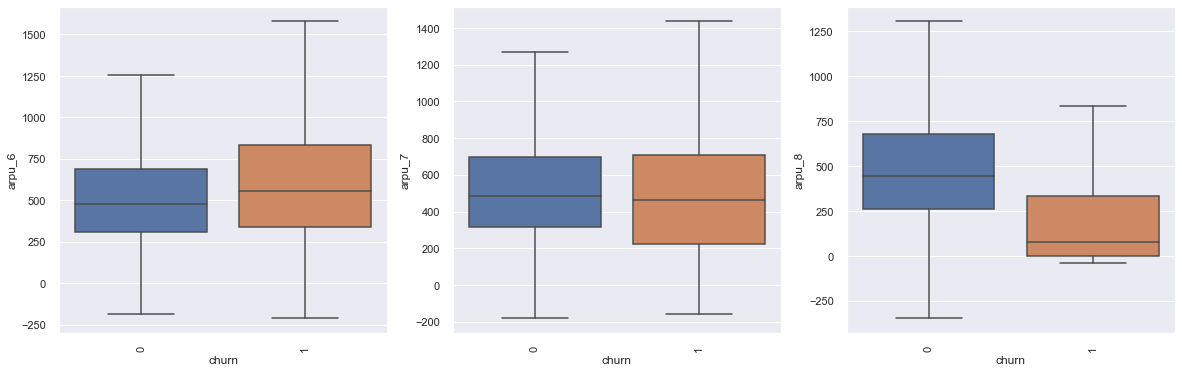

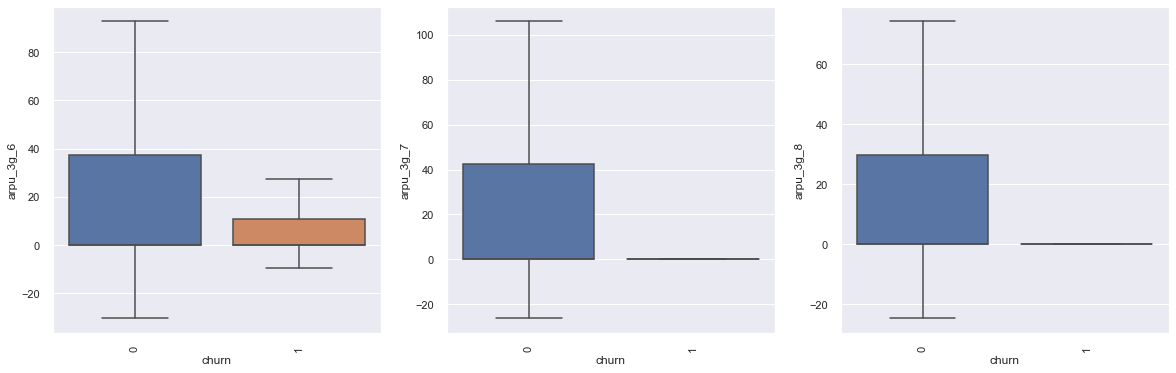

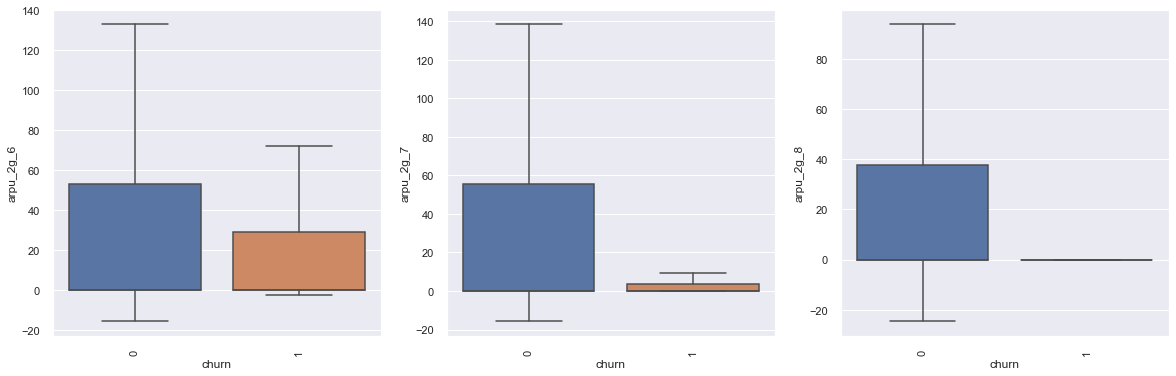

In [79]:
#Boxplot arpu attributes on Churn Status
prep_plt(arpu,3)

**Average revenue per user goes down in 8th month**

### Analysis on Minutes of usage - voice calls

In [80]:
#Find mou  Fields
mou = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains("mou")]
mou

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

There are lot of mou attributes, so lets split the attributes to outgoing and incoming calls

In [81]:
#Find mou outgoing Fields
mou_og = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('.*_og_.*mou',regex=True)]
mou_og

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

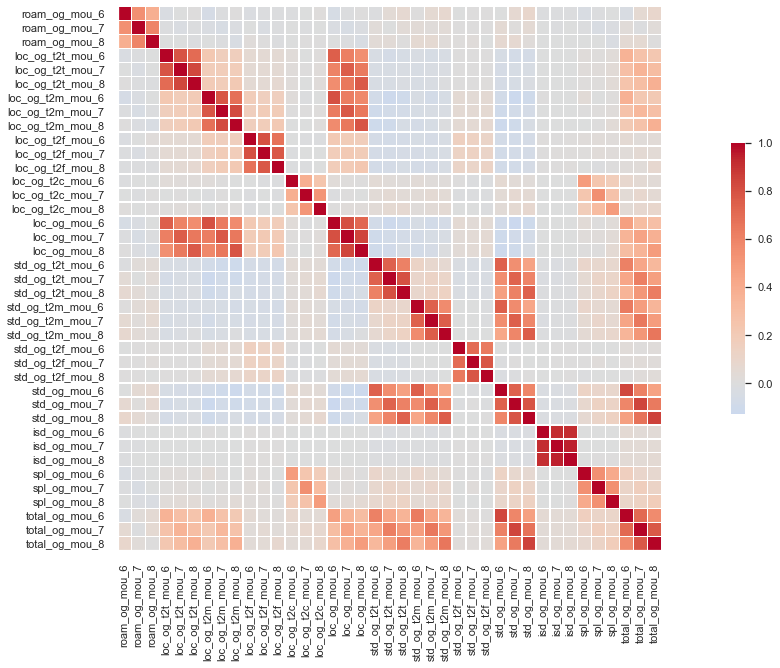

In [82]:
#Checking the Correlation for the mou_og Features using Heatmap
plt.figure(figsize=(25,10))
corr = telecom_high_val_cust[mou_og].corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm')
sns.despine()
#g.figure.set_size_inches(20,10)
    
plt.show()

- **Total Outgoing seems to be highly correlated to std_og and loc_og**
- **Loc columns are highly correlated with other loc columns**
- **std columns are highly correlated with other std columns**

In [83]:
#Lets check the data to confirm above
telecom_high_val_cust[['total_og_mou_6','std_og_mou_6','loc_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6']].sample(10)


,total_og_mou_6,std_og_mou_6,loc_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6
9151,87.09,0.00,84.81,0.0,1.09,1.18
26374,31.16,0.00,25.31,0.0,4.10,1.74
69407,1468.66,527.76,933.71,0.0,4.34,2.83
64370,0.00,0.00,0.00,0.0,0.00,0.00
2421,534.64,0.56,534.08,0.0,0.00,0.00
23,134.38,2.36,131.91,0.0,0.10,0.00
44086,956.74,191.46,765.28,0.0,0.00,0.00
80242,10.51,0.00,9.31,0.0,1.19,0.00
62629,763.23,11.83,751.39,0.0,0.00,0.00
65820,12.13,0.00,12.13,0.0,0.00,0.00


After checking the data, it is found that __total_og_mou_6__ is a combination of __std_og_mou_6 + loc_og_mou_6 + isd_og_mou_6 + spl_og_mou_6 +  og_others_6__ columns

In [84]:
#Check STD Outgoing columns data
telecom_high_val_cust[['std_og_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_t2m_mou_6']].sample(10)



,std_og_mou_6,std_og_t2t_mou_6,std_og_t2f_mou_6,std_og_t2m_mou_6
96599,8.58,0.00,0.0,8.58
8983,311.61,97.93,0.0,213.68
31635,575.54,90.43,0.0,485.11
68530,1545.16,1481.69,0.0,63.46
25667,0.00,0.00,0.0,0.00
33886,268.68,2.73,0.0,265.94
79535,556.96,0.00,0.0,556.96
19256,32.74,0.00,0.0,32.74
53828,662.79,18.23,0.0,644.56
11727,480.51,21.48,0.0,459.03


After checking the data, it is found that __std_og_mou_6__ is a combination of __std_og_t2t_mou_6 + std_og_t2f_mou_6 + std_og_t2m_mou_6__ columns

In [85]:
#Check Local Outgoing columns data
telecom_high_val_cust[['loc_og_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_t2m_mou_6']].sample(10)


,loc_og_mou_6,loc_og_t2t_mou_6,loc_og_t2f_mou_6,loc_og_t2m_mou_6
81965,0.00,0.00,0.00,0.00
548,116.58,17.16,33.84,65.56
70273,66.11,40.58,0.00,25.53
75349,188.53,16.31,0.00,172.21
49806,0.00,0.00,0.00,0.00
91799,69.61,39.29,0.00,30.31
90680,148.48,32.21,8.43,107.83
75980,332.16,83.83,6.14,242.18
15625,214.03,200.78,0.00,13.24
34686,36.74,8.11,0.00,28.63


After checking the data, it is found that __loc_og_mou_6 is a combination of loc_og_t2t_mou_6 + loc_og_t2f_mou_6 + loc_og_t2m_mou_6__ columns

We can conclude to drop below columns from the dataset: <br>

- loc_og_t2t_mou_6
- loc_og_t2t_mou_7
- loc_og_t2t_mou_8
- loc_og_t2f_mou_6
- loc_og_t2f_mou_7
- loc_og_t2f_mou_8
- loc_og_t2m_mou_6
- loc_og_t2m_mou_7
- loc_og_t2m_mou_8
- std_og_t2t_mou_6
- std_og_t2t_mou_7
- std_og_t2t_mou_8
- std_og_t2f_mou_6
- std_og_t2f_mou_7
- std_og_t2f_mou_8
- std_og_t2m_mou_6
- std_og_t2m_mou_7
- std_og_t2m_mou_8

In [86]:
cols_to_drop=['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7',
'loc_og_t2f_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7',
'std_og_t2t_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7',
              'std_og_t2m_mou_8']

In [87]:
#Drop Columns
print ('Shape before dropping ', telecom_high_val_cust.shape)
telecom_high_val_cust.drop(cols_to_drop,axis=1,inplace=True)
print ('Shape after dropping ', telecom_high_val_cust.shape)

Shape before dropping  (30001, 167)
Shape after dropping  (30001, 149)


In [88]:
#Find mou incoming Fields
mou_ic = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains('.*_ic_.*mou',regex=True)]
mou_ic

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')

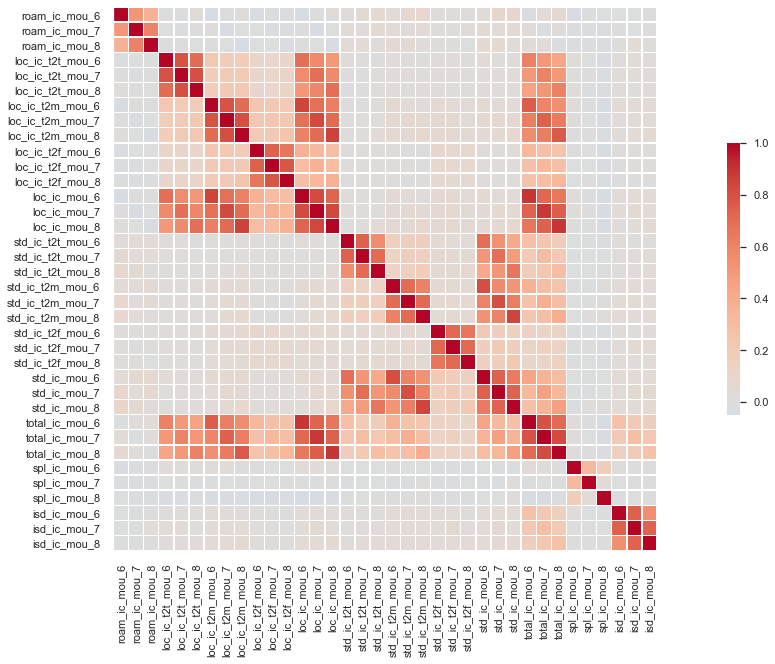

In [89]:
#Checking the Correlation for the mou_ic Features using Heatmap
plt.figure(figsize=(25,10))
corr = telecom_high_val_cust[mou_ic].corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm')
sns.despine()
#g.figure.set_size_inches(20,10)
    
plt.show()

- **Total Incoming seems to be highly correlated to loc_ic and std_ic**
- **Loc columns are highly correlated with other loc columns**
- **std columns are highly correlated with other std columns**

In [90]:
#Lets check the data to confirm above
telecom_high_val_cust[['total_ic_mou_6','std_ic_mou_6','loc_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6']].sample(10)


,total_ic_mou_6,std_ic_mou_6,loc_ic_mou_6,isd_ic_mou_6,spl_ic_mou_6,ic_others_6
60132,21.16,2.99,18.16,0.00,0.00,0.00
44128,362.66,4.08,358.58,0.00,0.00,0.00
89986,212.31,21.81,188.59,1.90,0.00,0.00
80486,327.16,0.00,327.16,0.00,0.00,0.00
50022,210.14,42.66,167.36,0.00,0.11,0.00
88419,87.19,69.13,18.06,0.00,0.00,0.00
48736,222.06,0.00,221.63,0.43,0.00,0.00
45995,259.94,32.46,227.48,0.00,0.00,0.00
7305,87.71,15.96,69.13,1.51,0.00,1.09
55139,306.36,3.14,303.21,0.00,0.00,0.00


After checking the data, it is found that __total_ic_mou_6__ is a combination of __std_ic_mou_6 + loc_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 +  ic_others_6__ columns

In [91]:
#Check STD incoming columns data
telecom_high_val_cust[['std_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2f_mou_6','std_ic_t2m_mou_6']].sample(10)



,std_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2f_mou_6,std_ic_t2m_mou_6
8188,0.78,0.28,0.50,0.00
29085,11.69,0.00,8.26,3.43
69299,13.15,0.00,0.00,13.15
79144,3.26,0.18,0.00,3.08
2073,22.01,0.00,0.00,22.01
46650,3246.98,1756.11,6.01,1484.84
43668,136.93,58.73,52.43,25.76
31238,13.04,1.09,0.00,11.94
34861,113.39,37.86,0.00,75.53
34832,76.74,8.14,0.00,68.59


After checking the data, it is found that __std_ic_mou_6__ is a combination of __std_ic_t2t_mou_6 + std_ic_t2f_mou_6 + std_ic_t2m_mou_6__ columns

In [92]:
#Check Local Incoming columns data
telecom_high_val_cust[['loc_ic_mou_6','loc_ic_t2t_mou_6','loc_ic_t2f_mou_6','loc_ic_t2m_mou_6']].sample(10)


,loc_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2f_mou_6,loc_ic_t2m_mou_6
23273,63.83,15.91,0.00,47.91
43914,69.61,21.61,0.00,47.99
36600,355.36,141.99,14.04,199.31
26979,57.01,34.56,0.00,22.44
8789,32.01,0.00,0.46,31.54
29720,77.18,19.84,0.61,56.71
54619,278.06,115.71,9.24,153.09
21591,9.29,8.01,0.00,1.28
56500,242.34,106.21,22.78,113.34
39709,94.98,63.29,1.98,29.69


After checking the data, it is found that __loc_ic_mou_6 is a combination of loc_ic_t2t_mou_6 + loc_ic_t2f_mou_6 + loc_ic_t2m_mou_6__ columns

We can conclude to drop below columns from the dataset: <br>

- loc_ic_t2t_mou_6
- loc_ic_t2t_mou_7
- loc_ic_t2t_mou_8
- loc_ic_t2f_mou_6
- loc_ic_t2f_mou_7
- loc_ic_t2f_mou_8
- loc_ic_t2m_mou_6
- loc_ic_t2m_mou_7
- loc_ic_t2m_mou_8
- std_ic_t2t_mou_6
- std_ic_t2t_mou_7
- std_ic_t2t_mou_8
- std_ic_t2f_mou_6
- std_ic_t2f_mou_7
- std_ic_t2f_mou_8
- std_ic_t2m_mou_6
- std_ic_t2m_mou_7
- std_ic_t2m_mou_8

In [93]:
cols_to_drop=['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7',
'std_ic_t2t_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7',
              'std_ic_t2m_mou_8']

In [94]:
#Drop Columns
print ('Shape before dropping ', telecom_high_val_cust.shape)
telecom_high_val_cust.drop(cols_to_drop,axis=1,inplace=True)
print ('Shape after dropping ', telecom_high_val_cust.shape)

Shape before dropping  (30001, 149)
Shape after dropping  (30001, 131)


### Age on Network Analysis

In [95]:
#Create new feature tenure years
telecom_high_val_cust['aon_y'] = telecom_high_val_cust['aon']/365
telecom_high_val_cust.drop('aon', axis=1, inplace=True)

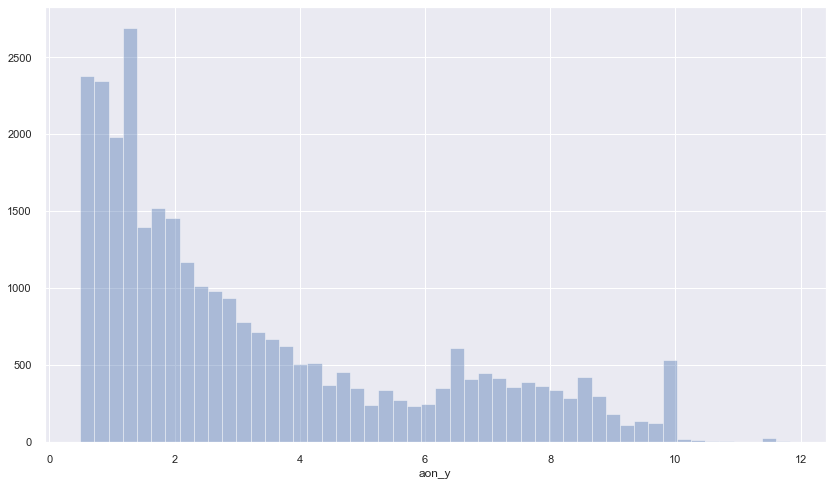

In [96]:
#Plot Tenure
plt.figure(figsize=(14,8))
ax = sns.distplot(telecom_high_val_cust['aon_y'], hist=True, kde=False)
plt.show()

In [97]:
#Create Tenure range
telecom_high_val_cust['ten_range'] = pd.cut(telecom_high_val_cust.aon_y, bins=[0,2,4,6,8,10,12], labels=["2_y","4_y","6_y","8_y","10_y","12_y"])


In [98]:
telecom_high_val_cust['ten_range'].unique()

[4_y, 2_y, 6_y, 10_y, 8_y, 12_y]
Categories (6, object): [2_y < 4_y < 6_y < 8_y < 10_y < 12_y]

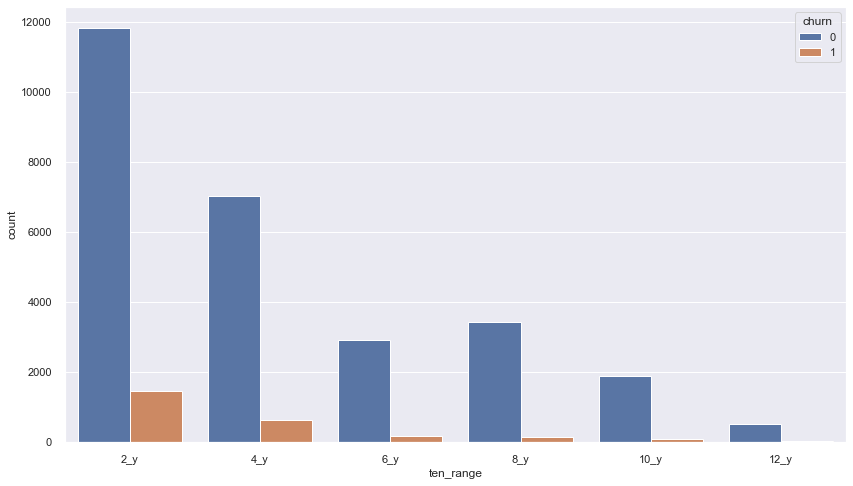

In [99]:
#Plot Barplot on Tenure Range
plt.figure(figsize=(14,8))
ax = sns.countplot(telecom_high_val_cust['ten_range'],hue=telecom_high_val_cust['churn'])
plt.show()

- __The longer the tenure, the churn percentage is smaller__

### ONNET/OFFNET Analysis

- ONNET: All kind of calls within the same operator network
- OFFNET: All kind of calls outside the operator T network

In [100]:
#Find onnet/offnet  Fields
onnet_offnet = telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains("onnet|offnet")]
onnet_offnet

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

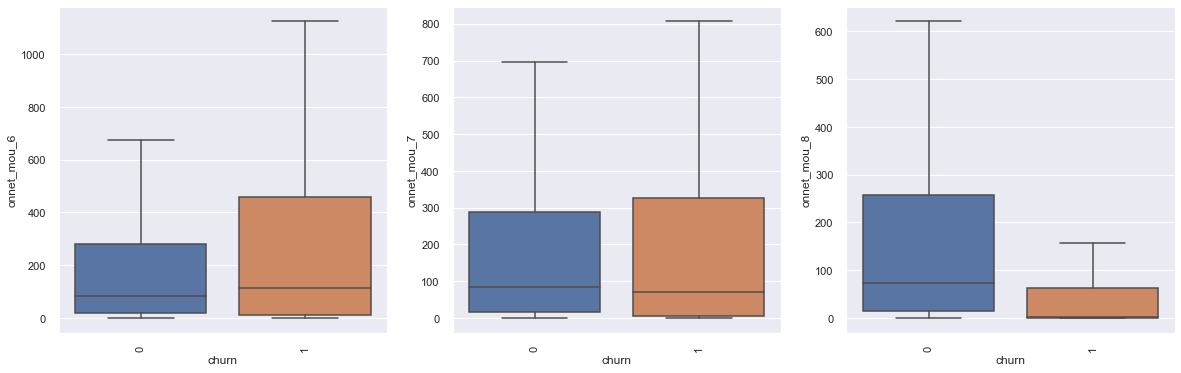

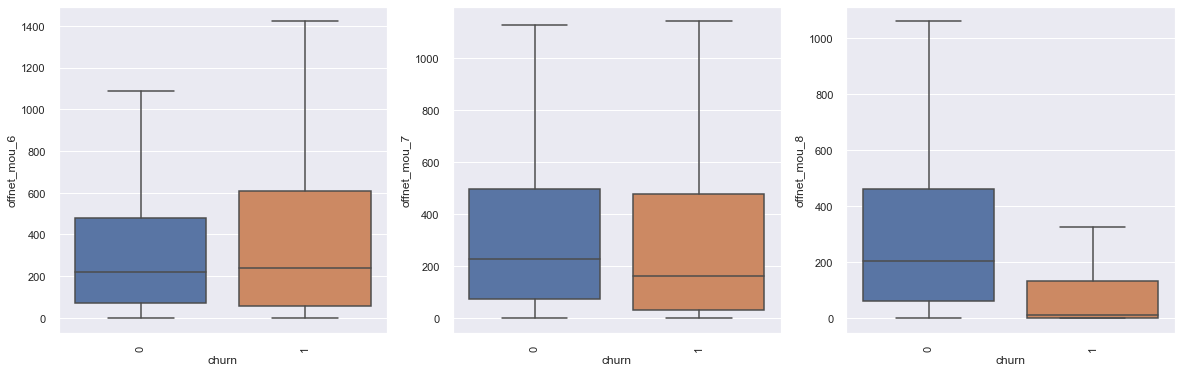

In [101]:
#Boxplot onnet/offnet attributes on Churn Status
prep_plt(onnet_offnet,3)

**Significant drop in onnet and offnet usage in the 8th month for Churn Customers**

In [102]:
#remove  date columns
date=telecom_high_val_cust.columns[telecom_high_val_cust.columns.str.contains("date")]
date

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [103]:
#Drop Columns
print ('Shape before dropping ', telecom_high_val_cust.shape)
telecom_high_val_cust.drop(date,axis=1,inplace=True)
print ('Shape after dropping ', telecom_high_val_cust.shape)

Shape before dropping  (30001, 132)
Shape after dropping  (30001, 126)


In [104]:
#Drop Columns
print ('Shape before dropping ', telecom_high_val_cust.shape)
telecom_high_val_cust.drop('ten_range',axis=1,inplace=True)
print ('Shape after dropping ', telecom_high_val_cust.shape)

Shape before dropping  (30001, 126)
Shape after dropping  (30001, 125)


<a id=section5></a>
## 5 Outlier Treatment and Deriving New Features

In [105]:
#Check Distribution of data
telecom_high_val_cust.describe([.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amount_good_phase,avg_rech_amount_good_phase,churn,days_rech_left_6,days_rech_left_7,days_rech_left_8,aon_y
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,1.575104,1.889875,1.707746,254.080388,255.116292,235.728174,347.125955,363.984508,307.379315,2.171525,2.105743,1.948970,5.818270,7.108646,6.557204,0.661092,0.042905,0.057607,609.866251,628.366047,551.678812,231.153776,234.307412,223.264679,46.789434,49.046114,44.401653,289.950496,296.756987,279.922931,0.061035,0.019765,0.026567,10.784689,11.875796,10.998257,1.153449,1.500338,1.224455,11.851005,11.718843,9.972868,660.732342,660.4

- __There are columns which are highly skewed but could also represent very high value customer__
- __We will not remove any outliers right now in order to avoid dropping high value customer__

### Derive New Features

In [106]:
#Create a list of all columns and sort it
col_lst = list(telecom_high_val_cust.columns)
col_lst.sort()

In [107]:
# Create list of 6th and 7th month columns
lst_6 = [x for x in col_lst if '_6' in x]
lst_7 = [x for x in col_lst if '_7' in x]

In [108]:
lst_avg=[]
for x in lst_6:
    size = len(x)
    lst_avg.append(x[:size - 2] )
    
#lst_avg

In [109]:
#Combine 6th and 7th month data and create an average value for "Good" Phase
#Then create new features by subtracting values from good phase to action phase
print ('Shape before adding ', telecom_high_val_cust.shape)
for x in lst_avg:
    if (telecom_high_val_cust[x + "_6"].dtypes == 'int64' or telecom_high_val_cust[x + "_6"].dtypes == 'float64'):
        telecom_high_val_cust[x + "_avg_6_7"] = (telecom_high_val_cust[x + "_6"] + telecom_high_val_cust[x + "_7"])/2
        telecom_high_val_cust[x + "_diff"] = (telecom_high_val_cust[x + "_avg_6_7"] - telecom_high_val_cust[x + "_8"])
print ('Shape after adding ', telecom_high_val_cust.shape)

Shape before adding  (30001, 125)
Shape after adding  (30001, 203)


In [110]:
#Drop individual 6th and 7th month columns 
print ('Shape before dropping ', telecom_high_val_cust.shape)
telecom_high_val_cust.drop(lst_6,axis=1,inplace=True)
telecom_high_val_cust.drop(lst_7,axis=1,inplace=True)
print ('Shape after dropping ', telecom_high_val_cust.shape)

Shape before dropping  (30001, 203)
Shape after dropping  (30001, 125)


In [111]:
#Create a copy of the dataframe
telecom_final=telecom_high_val_cust.copy()

<a id=section6></a>
## 6 Splitting the Data into Training and Testing Sets

The first basic step for regression is to split the data and perform a train-test split.

### Dividing into X and Y sets for the model building

In [112]:
# splitting into X and y
X = telecom_final.drop(['churn','mobile_number'], axis = 1)
y = telecom_final.churn

### Apply SMOTE

As the data is highly imabalanced, we are using SMOTE (synthetic minority oversampling technique). It is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [115]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [116]:
X_resample.shape

(55120, 123)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [118]:
y_train.head()

,0
11900,0
48877,1
41327,1
1811,0
10769,0


###  Rescaling the Features 

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()

In [121]:
# Apply scaler() to Train data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns,index=X_train.index)
X_train_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_8,total_rech_amount_good_phase,avg_rech_amount_good_phase,days_rech_left_8,aon_y,arpu_2g_avg_6_7,arpu_2g_diff,arpu_3g_avg_6_7,arpu_3g_diff,arpu_avg_6_7,arpu_diff,av_rech_amt_data_avg_6_7,av_rech_amt_data_diff,count_rech_2g_avg_6_7,count_rech_2g_diff,count_rech_3g_avg_6_7,count_rech_3g_diff,days_rech_left_avg_6_7,days_rech_left_diff,fb_user_avg_6_7,fb_user_diff,ic_others_avg_6_7,ic_others_diff,isd_ic_mou_avg_6_7,isd_ic_mou_diff,isd_og_mou_avg_6_7,isd_og_mou_diff,last_day_rch_amt_avg_6_7,last_day_rch_amt_diff,loc_ic_mou_avg_6_7,loc_ic_mou_diff,loc_og_mou_avg_6_7,loc_og_mou_diff,loc_og_t2c_mou_avg_6_7,loc_og_t2c_mou_diff,max_rech_amt_avg_6_7,max_rech_amt_diff,max_rech_data_avg_6_7,max_rech_data_diff,monthly_2g_avg_6_7,monthly_2g_diff,monthly_3g_avg_6_7,monthly_3g_diff,night_pck_user_avg_6_7,night_pck_user_diff,offnet_mou_avg_6_7,offnet_mou_diff,og_others_avg_6_7,og_others_diff,onnet_mou_avg_6_7,onnet_mou_diff,roam_ic_mou_avg_6_7,roam_ic_mou_diff,roam_og_mou_avg_6_7,roam_og_mou_diff,sachet_2g_avg_6_7,sachet_2g_diff,sachet_3g_avg_6_7,sachet_3g_diff,spl_ic_mou_avg_6_7,spl_ic_mou_diff,spl_og_mou_avg_6_7,spl_og_mou_diff,std_ic_mou_avg_6_7,std_ic_mou_diff,std_og_mou_avg_6_7,std_og_mou_diff,total_ic_mou_avg_6_7,total_ic_mou_diff,total_og_mou_avg_6_7,total_og_mou_diff,total_rech_amt_avg_6_7,total_rech_amt_diff,total_rech_amt_data_avg_6_7,total_rech_amt_data_diff,total_rech_data_avg_6_7,total_rech_data_diff,total_rech_num_avg_6_7,total_rech_num_diff,vol_2g_mb_avg_6_7,vol_2g_mb_diff,vol_3g_mb_avg_6_7,vol_3g_mb_diff
11900,-0.438240,-0.438574,-0.556955,-0.191856,-0.234377,0.234799,-0.495735,-0.441896,-0.04017,0.039277,-0.018276,-0.613499,-0.450120,-0.273040,-0.505714,-0.162059,-0.136544,-0.076572,-0.426641,-0.381086,0.475470,-0.500155,-0.022219,1.544635,0.108273,-0.279478,0.732782,3.944102,-0.314221,-0.308143,-0.316658,-0.08836,2.950268,-0.324371,-0.273234,-0.150574,1.490578,-0.315348,-0.359665,-0.362111,-0.076207,0.714105,0.714105,-0.282471,-0.167793,-0.353339,-0.071702,-0.416357,-0.161850,-0.996609,-0.575765,0.562130,-0.190939,3.255216,3.709836,-0.389167,-0.158073,-0.414625,-0.001549,1.231901,-0.361135,-0.093445,-0.036364,-0.187916,-0.081868,-0.064664,-0.06098,-0.627131,-0.037383,-0.521432,-0.138751,-0.618377,-0.222435,-0.264309,-0.462982,-0.895300,-1.455432,-0.428048,-2.441187,-0.405798,-3.503638,-0.387500,-0.132384,-0.143834,-0.060612,-0.778650,-0.348796,0.024604,0.045148,-0.618239,-0.292554,-0.231148,-0.025241,-0.278699,-0.051265,3.308618,4.281191,-0.239101,-0.108851,-0.297761,-0.152119,-0.346908,-0.380100,-0.377040,-0.166102,-0.675989,-0.362373,-0.629907,-0.197637,-0.926464,-0.410119,-1.007312,-0.623417,1.269603,1.397145,2.645877,3.100591,-0.032713,0.437594,1.932363,-1.761646,-0.413591,-0.129587
48877,0.666581,-0.252090,2.559418,-0.191856,-0.234377,-0.106795,-0.217094,2.001545,-0.04017,1.068277,-0.018276,1.618575,-0.304412,-0.186961,-0.334218,-0.162059,-0.038467,-0.076572,0.532033,0.301969,0.961095,1.208464,-0.433285,-0.495205,-0.383390,-0.279478,-0.481330,-0.277375,-0.314221,-0.308143,-0.316740,-0.08836,-0.272002,-0.324371,-0.273234,-0.150574,-0.697040,-0.315348,-0.359665,-0.362111,-0.268972,0.260872,0.260872,1.919877,0.873490,-0.441043,-0.178183,-0.416357,-0.161850,1.592551,0.959384,-0.701547,-0.265872,-0.534984,-0.220068,-0.389167,-0.158073,-1.085766,-2.445974,-1.038024,-0.361135,-0.093445,-0.036364,-0.187916,-0.217080,-0.064664,-0.06098,0.137065,-1.059661,-0.371998,-0.120875,-0.3

In [122]:
X_train_scaled.shape   #Check shape of train dataset

(38584, 123)

In [123]:
# Apply scaler() to Test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns,index=X_test.index)
X_test_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_8,total_rech_amount_good_phase,avg_rech_amount_good_phase,days_rech_left_8,aon_y,arpu_2g_avg_6_7,arpu_2g_diff,arpu_3g_avg_6_7,arpu_3g_diff,arpu_avg_6_7,arpu_diff,av_rech_amt_data_avg_6_7,av_rech_amt_data_diff,count_rech_2g_avg_6_7,count_rech_2g_diff,count_rech_3g_avg_6_7,count_rech_3g_diff,days_rech_left_avg_6_7,days_rech_left_diff,fb_user_avg_6_7,fb_user_diff,ic_others_avg_6_7,ic_others_diff,isd_ic_mou_avg_6_7,isd_ic_mou_diff,isd_og_mou_avg_6_7,isd_og_mou_diff,last_day_rch_amt_avg_6_7,last_day_rch_amt_diff,loc_ic_mou_avg_6_7,loc_ic_mou_diff,loc_og_mou_avg_6_7,loc_og_mou_diff,loc_og_t2c_mou_avg_6_7,loc_og_t2c_mou_diff,max_rech_amt_avg_6_7,max_rech_amt_diff,max_rech_data_avg_6_7,max_rech_data_diff,monthly_2g_avg_6_7,monthly_2g_diff,monthly_3g_avg_6_7,monthly_3g_diff,night_pck_user_avg_6_7,night_pck_user_diff,offnet_mou_avg_6_7,offnet_mou_diff,og_others_avg_6_7,og_others_diff,onnet_mou_avg_6_7,onnet_mou_diff,roam_ic_mou_avg_6_7,roam_ic_mou_diff,roam_og_mou_avg_6_7,roam_og_mou_diff,sachet_2g_avg_6_7,sachet_2g_diff,sachet_3g_avg_6_7,sachet_3g_diff,spl_ic_mou_avg_6_7,spl_ic_mou_diff,spl_og_mou_avg_6_7,spl_og_mou_diff,std_ic_mou_avg_6_7,std_ic_mou_diff,std_og_mou_avg_6_7,std_og_mou_diff,total_ic_mou_avg_6_7,total_ic_mou_diff,total_og_mou_avg_6_7,total_og_mou_diff,total_rech_amt_avg_6_7,total_rech_amt_diff,total_rech_amt_data_avg_6_7,total_rech_amt_data_diff,total_rech_data_avg_6_7,total_rech_data_diff,total_rech_num_avg_6_7,total_rech_num_diff,vol_2g_mb_avg_6_7,vol_2g_mb_diff,vol_3g_mb_avg_6_7,vol_3g_mb_diff
11417,-0.682955,-0.362470,-0.523515,-0.191856,-0.234377,-0.223884,-0.425685,-0.387752,-0.04017,-0.294480,-0.018276,-0.542576,-0.523712,-0.139439,-0.519853,-0.162059,-0.136544,-0.076572,-0.666309,-0.750113,-0.741665,-0.500155,-0.022219,7.282972,-0.38339,0.739511,4.148236,-0.152583,4.365127,4.553847,4.994848,-0.08836,-0.272002,-0.324371,1.854835,-0.150574,1.490578,2.992396,5.027843,4.033038,0.466068,-0.487790,-0.487790,1.189392,0.145335,2.027509,-3.177852,3.357877,-0.978003,-0.209990,0.567677,1.586404,-2.959904,-0.534984,-0.220068,0.080310,-0.721817,-0.683081,-1.521882,0.096939,-1.663323,-0.093445,-0.036364,-0.140747,-0.014066,-0.064664,-0.060980,0.511988,0.913022,-0.633753,-0.199246,-0.631097,-0.339215,1.745203,1.923492,-0.084367,0.740062,3.129883,-5.036698,-0.405798,-0.130410,0.613220,-1.322097,-0.143834,-0.060612,-0.761825,-0.362298,-0.180693,-0.110371,-0.593206,-0.342578,-0.231148,-0.025241,-0.278699,-0.051265,-0.476704,-0.201084,-0.239101,-0.108851,-0.297761,-0.152119,0.419387,0.703164,-0.039586,0.109822,-0.651810,-0.386419,-0.589899,-0.125386,-0.892717,-0.444249,-1.021018,-0.205043,-0.047699,-0.517189,-0.428150,-0.473673,-0.902455,-0.255328,-0.399872,-0.297179,1.424781,-3.703177
1430,1.386454,-0.427705,-0.111756,-0.108841,0.143557,0.206572,-0.424785,-0.217048,-0.04017,0.351158,-0.018276,-0.380883,-0.305478,-0.122167,-0.329091,-0.162059,-0.136544,-0.076572,1.251038,1.398405,0.807416,-0.265024,1.210981,2.100955,1.09160,0.739511,3.896829,4.653808,4.255937,1.544463,1.678027,-0.08836,9.394807,-0.324371,1.854835,-0.150574,1.490578,-0.315348,-0.359665,-0.362111,2.511525,0.264033,0.264033,-0.650436,-0.240419,-0.413351,-2.397585,-0.346909,-2.122912,-0.041486,-1.662639,1.165179,-3.163294,0.356827,-0.744055,-0.389167,-1.285562,-0.817310,0.082914,1.231901,-0.361135,-0.093445,-0.036364,-0.187916,-0.081868,-0.064664,-0.060980,-0.016563,0.243937,-0.547929,-0.365204,-0.601926,-0.297282,0.

In [124]:
X_test_scaled.shape   #Check shape of test dataset

(16536, 123)

<a id=section7></a>
## 7 PCA 

In [125]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=100)

In [126]:
#Doing the PCA on the train data
pca.fit(X_train_scaled)

PCA(random_state=100)

In [127]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

,PC1,PC2,Feature
0,0.094584,-0.184395,arpu_8
1,-0.002902,-0.131247,onnet_mou_8
2,0.015790,-0.156676,offnet_mou_8
3,-0.003356,-0.021769,roam_ic_mou_8
4,-0.003448,-0.041407,roam_og_mou_8
5,0.013638,-0.045576,loc_og_t2c_mou_8
6,0.044420,-0.124498,loc_og_mou_8
7,-0.015646,-0.140283,std_og_mou_8
8,0.018399,-0.034328,isd_og_mou_8
9,0.014655,-0.063542,spl_og_mou_8


In [128]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [11.7  9.3  6.5  5.4  5.3  3.5  3.3  2.8  2.2  2.2  2.1  2.   1.9  1.8
  1.7  1.7  1.7  1.6  1.5  1.5  1.4  1.4  1.3  1.3  1.2  1.2  1.1  1.1
  1.1  1.   1.   1.   0.9  0.9  0.9  0.8  0.8  0.8  0.7  0.7  0.7  0.6
  0.6  0.6  0.6  0.6  0.5  0.5  0.5  0.4  0.4  0.4  0.3  0.3  0.3  0.3
  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [129]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([11.73, 20.99, 27.52, 32.89, 38.24, 41.76, 45.06, 47.87, 50.12,
       52.28, 54.38, 56.38, 58.3 , 60.13, 61.86, 63.53, 65.2 , 66.81,
       68.33, 69.83, 71.27, 72.68, 74.  , 75.28, 76.51, 77.69, 78.84,
       79.94, 81.02, 82.07, 83.09, 84.05, 84.97, 85.87, 86.72, 87.54,
       88.32, 89.08, 89.81, 90.51, 91.17, 91.8 , 92.41, 93.01, 93.59,
       94.17, 94.7 , 95.2 , 95.67, 96.11, 96.54, 96.91, 97.25, 97.57,
       97.86, 98.14, 98.4 , 98.63, 98.84, 99.03, 99.2 , 99.36, 99.51,
       99.62, 99.71, 99.8 , 99.87, 99.92, 99.96, 99.97, 99.98, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

In [130]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

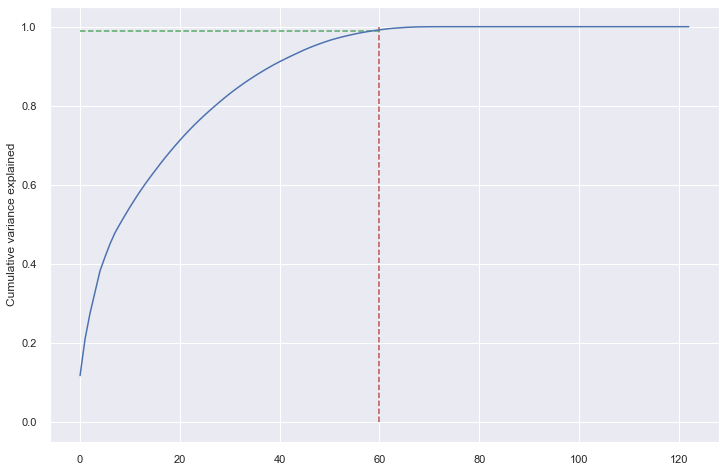

In [131]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**Looks like 60 components are describing 99% of the variance in the dataset.We'll choose columns which explains 95% variance**

In [132]:
#Choose components with 95% variance
pca_final = PCA(0.95)
#Scale and transform data to get Principal Components

Xtrain_reduced = pca_final.fit_transform(X_train_scaled)
Xtest_reduced = pca_final.transform(X_test_scaled)

In [133]:
print ('Training Data Shape after PCA:', Xtrain_reduced.shape)
print ('Testing Data Shape after PCA:', Xtest_reduced.shape)

Training Data Shape after PCA: (38584, 48)
Testing Data Shape after PCA: (16536, 48)


__48 PC Columns are selected__

<a id=section8></a>
## 8 Model Building with Default Parameters

<a id=section801></a>
### 8.1 Logistic Regression

In [134]:
#Define Threshold
#THRESHOLD=0.5
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(random_state=0)
model = lr.fit(Xtrain_reduced,y_train)
#Making prediction on the test data
pred_probs_test = model.predict_proba(Xtest_reduced)
y_pred=model.predict(Xtest_reduced)
#y_pred=np.where(pred_probs_test[:,1] > THRESHOLD, 1, 0)

In [135]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrix')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrix
--------------------------
[[6866 1390]
 [1140 7140]]
--------------------------
Accuracy : 0.8470004837929366
--------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      8256
           1       0.84      0.86      0.85      8280

    accuracy                           0.85     16536
   macro avg       0.85      0.85      0.85     16536
weighted avg       0.85      0.85      0.85     16536



AUC: 0.847


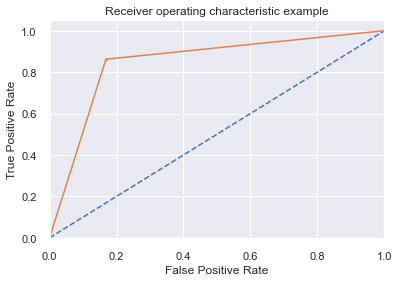

In [136]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker='.')
plt.show()

<a id=section802></a>
### 8.2 RandomForest 

In [137]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(Xtrain_reduced, y_train)

RandomForestClassifier()

In [138]:
classifier.get_params()   #print default parameters of RandomForest

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [139]:
y_pred = classifier.predict(Xtest_reduced)  #predict Test

In [140]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrix')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrix
--------------------------
[[7714  542]
 [ 317 7963]]
--------------------------
Accuracy : 0.9480527334300919
--------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8256
           1       0.94      0.96      0.95      8280

    accuracy                           0.95     16536
   macro avg       0.95      0.95      0.95     16536
weighted avg       0.95      0.95      0.95     16536



AUC: 0.948


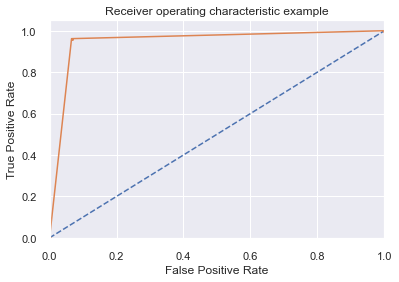

In [141]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker='.')
plt.show()

<a id=section803></a>
### 8.3 SVM 

In [142]:
#SVC
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(Xtrain_reduced, y_train)

SVC()

In [143]:
svc_model.get_params()   #print default parameters of SVM

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [144]:
y_pred = svc_model.predict(Xtest_reduced) #Predict Test

In [145]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrix')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrix
--------------------------
[[7378  878]
 [ 557 7723]]
--------------------------
Accuracy : 0.9132196419932269
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      8256
           1       0.90      0.93      0.91      8280

    accuracy                           0.91     16536
   macro avg       0.91      0.91      0.91     16536
weighted avg       0.91      0.91      0.91     16536



AUC: 0.913


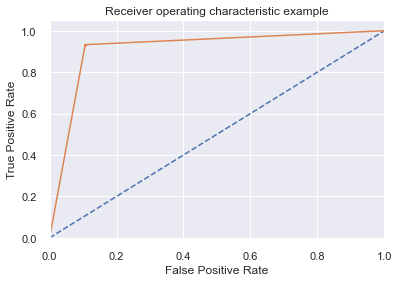

In [146]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker='.')
plt.show()

<a id=section804></a>
### 8.4 Model Comparison

After running vanilla models, lets compare the results <br>

| Metrics   | Logistic Model | RandomForest Model | SVM Model|
| ------------- | :-----------------------|:---------------|:----------------- :|
|  Accuracy | 0.84       | 0.94 | 0.91|
| Precision | 0.83       | 0.94|0.90                              | 
| Recall | 0.87          |  0.96|0.94|
| F-1 Score | 0.85       |  0.95|0.92|
| AUC  | 0.84            |    0.95|0.91                                   | 

All the above vanilla models give decent accuracy but __RandomForest with default parameters__ provides the highest accuracy and recall score. As we are interested in predicting the Churn, __Recall__ is utmost important and it is equally good in all the vanilla models above.


We will try RANDOMFOREST, SVM and XGBOOST using HyperParameter Tuning to see if we can improve recall score further and get a more accurate Churn prediction.

<a id=section9></a>
## 9 Improving Model using Hyperparameter Tuning

We will now tune some models with Hyperparameter Tuning, focusing mainly on Recall Score as we need to make sure to predict the Churn Customers right so that the company can take action steps such as providing special plans, discounts on recharge etc.

<a id=section901></a>
### 9.1 RANDOMFOREST

In [147]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Create the parameter grid based on the results of random/grid search 
param_grid = {
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100,200,300], 
    'max_features' : [2,3]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,return_train_score=True,verbose = 1)

In [148]:
# Fit the grid search to the data
grid_search.fit(Xtrain_reduced,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 43.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [149]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.936139365864872 using {'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [150]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=50,
                             min_samples_leaf=1, 
                             min_samples_split=2,
                             max_features=3,
                             n_estimators=300)

In [151]:
# fit
rfc.fit(Xtrain_reduced,y_train)

RandomForestClassifier(max_depth=50, max_features=3, n_estimators=300)

In [152]:
# predict
y_pred = rfc.predict(Xtest_reduced)

In [155]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrix')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrix
--------------------------
[[7731  525]
 [ 333 7947]]
--------------------------
Accuracy : 0.9481132075471698
--------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8256
           1       0.94      0.96      0.95      8280

    accuracy                           0.95     16536
   macro avg       0.95      0.95      0.95     16536
weighted avg       0.95      0.95      0.95     16536



AUC: 0.948


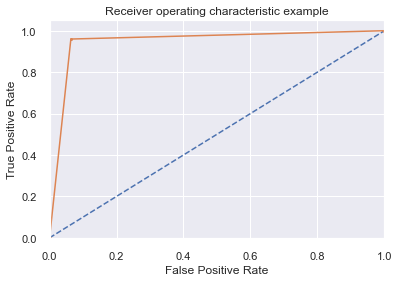

In [156]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker='.')
plt.show()

<a id=section902></a>
### 9.2 XGBOOST

In [157]:
#Training
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'booster': ['gbtree'], 'gamma': [0.1,0.5,0.2], 'n_estimators':[20], 'reg_alpha': range(1,10),'learning_rate': [0.1,0.5,0.3,1.0]}
grid = GridSearchCV(XGBClassifier(),param_grid,refit=True,n_jobs = -1,verbose=4)
grid.fit(Xtrain_reduced,y_train)
print (grid.best_params_)
print (grid.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 18.2min finished


{'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 1.0, 'n_estimators': 20, 'reg_alpha': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [158]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_gamma,param_learning_rate,param_n_estimators,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.759569,0.071807,0.020077,0.000813,gbtree,0.1,0.1,20,1,"{'booster': 'gbtree', 'gamma': 0.1, 'learning_...",0.868861,0.867565,0.864714,0.865881,0.862105,0.865825,0.002338,89
1,7.544158,0.053379,0.019123,0.000298,gbtree,0.1,0.1,20,2,"{'booster': 'gbtree', 'gamma': 0.1, 'learning_...",0.869379,0.867047,0.865751,0.867565,0.864697,0.866888,0.001599,82
2,7.886718,0.339380,0.019501,0.001523,gbtree,0.1,0.1,20,3,"{'booster': 'gbtree', 'gamma': 0.1, 'learning_...",0.869898,0.868991,0.862771,0.867824,0.863401,0.866577,0.002932,85
3,7.695272,0.240249,0.018986,0.000443,gbtree,0.1,0.1,20,4,"{'booster': 'gbtree', 'gamma': 0.1, 'learning_...",0.866917,0.868213,0.862252,0.865751,0.863660,0.865359,0.002157,94
4,7.450025,0.034130,0.019984,0.002172,gbtree,0.1,0.1,20,5,"{'booster': 'gbtree', 'gamma': 0.1, 'learning_...",0.869638,0.866917,0.864326,0.864455,0.863660,0.865799,0.002216,91


In [171]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
#params = {booster='gbtree', gamma: 0.5, learning_rate: 1.0, n_estimators: 20, reg_alpha: 1}

# fit model on training data
model = XGBClassifier(booster='gbtree', gamma= 0.5, learning_rate= 1.0, n_estimators= 20, reg_alpha= 1)
model.fit(Xtrain_reduced,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
#Predictions
y_pred = model.predict(Xtest_reduced)

In [173]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.9091438110886417

In [174]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7369,  887],
       [ 615, 7665]])

In [175]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrx')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrx
--------------------------
[[7369  887]
 [ 615 7665]]
--------------------------
Accuracy : 0.9091678761490082
--------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      8256
           1       0.90      0.93      0.91      8280

    accuracy                           0.91     16536
   macro avg       0.91      0.91      0.91     16536
weighted avg       0.91      0.91      0.91     16536



AUC: 0.909


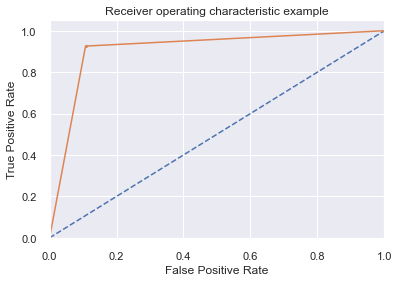

In [176]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker='.')
plt.show()

<a id=section903></a>
### 9.3 SVM

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]} 

In [232]:
# specify model
model = SVC(kernel="rbf")


In [233]:
# set up GridSearchCV()
model_cv_svm = GridSearchCV(estimator = model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 4,
                        return_train_score=True)      


In [234]:
# fit the model
model_cv_svm.fit(Xtrain_reduced,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 87.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]},
             return_train_score=True, scoring='accuracy', verbose=4)

In [235]:
 #printing the optimal accuracy score and hyperparameters
best_score = model_cv_svm.best_score_
best_hyperparams = model_cv_svm.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9644412943006604 corresponding to hyperparameters {'C': 10, 'gamma': 0.1}


In [236]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.1, "kernel":"rbf"}

# model
model = SVC(C=10, gamma=0.1, kernel="rbf")

model.fit(Xtrain_reduced,y_train)
y_pred = model.predict(Xtest_reduced)


In [237]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrix')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrix
--------------------------
[[7990  266]
 [ 229 8051]]
--------------------------
Accuracy : 0.9700653120464441
--------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8256
           1       0.97      0.97      0.97      8280

    accuracy                           0.97     16536
   macro avg       0.97      0.97      0.97     16536
weighted avg       0.97      0.97      0.97     16536



AUC: 0.970


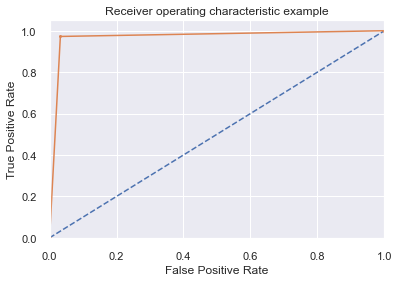

In [238]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker='.')
plt.show()

<a id=section904></a>
### 9.4 Model Comparison

After running models with HyperParameter Tuning, lets compare the results <br>

| Metrics   | RandomForest Model | XGBOOST Model | SVM Model|
| ------------- | :-----------------------|:---------------|:----------------- :|
|  Accuracy | 0.94         | 0.90 | 0.97|
| Precision          | 0.90       | 0.92|0.97                              | 
| Recall | 0.96      |  0.93|0.97|
| F-1 Score | 0.95       |  0.91|0.97|
| AUC  | 0.94        |    0.91|0.97                                     | 

As we can see Hyperparameter tuned models provides a decent Recall score thus predicting the churn correctly over 90% of the time. However, __SVM model (with "rbf" kernel)__ performed the best in terms of __Recall Accuracy__ but it consumed a lot of time training the model. If time or computing resources is a factor, __Random Forest (with Default Parameters) is a good model__ without compromising the accuracy/recall score much.

<a id=section10></a>
## 10 Building an Interpretable model

Let's now try predicting Churn with a more interpretable model


###  RFE

In [177]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(lr, 30)         # Reduce the variable to 30
rfe = rfe.fit(X_train_scaled, y_train)
col = X_train_scaled.columns[rfe.support_]


###  Fit the model

In [178]:
# Fitting Model to the Training Set
lr.fit(X_train_scaled[X_train_scaled.columns[rfe.support_]], y_train)

LogisticRegression()

In [179]:
# Predicting Test Set
y_pred = lr.predict(X_test_scaled[X_train_scaled.columns[rfe.support_]])


###  Lets check the performance of the model

In [180]:
# Evaluating Results
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrix')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrix
--------------------------
[[7445  811]
 [ 683 7597]]
--------------------------
Accuracy : 0.9096516690856313
--------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8256
           1       0.90      0.92      0.91      8280

    accuracy                           0.91     16536
   macro avg       0.91      0.91      0.91     16536
weighted avg       0.91      0.91      0.91     16536



AUC: 0.910


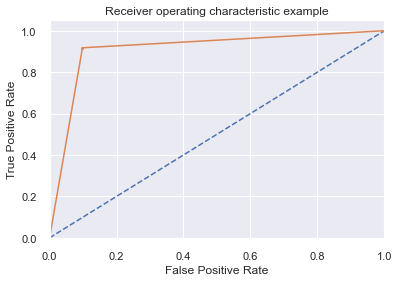

In [181]:
#Let see the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr, tpr, marker='.')
plt.show()


###  Lets check the multicollinearity of the attributes

There is a high chance that the selected attributes may have high co-relation/multicollinearity amongst them. So let try to check that with the help of `VIF`.

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#List out the columns identified by 
col = X_train_scaled.columns[rfe.support_]

In [183]:
#Define the function to calculate VIF
def calc_vif(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train_scaled[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train_scaled[col].values, i) for i in range(X_train_scaled[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)


###  Iterate through the process to reduce VIF

In [184]:
#Check VIF
calc_vif(col)

                    Features        VIF
15        count_rech_3g_diff        inf
27      total_rech_data_diff        inf
14     count_rech_3g_avg_6_7        inf
13        count_rech_2g_diff        inf
12     count_rech_2g_avg_6_7        inf
24         sachet_2g_avg_6_7        inf
21           monthly_2g_diff        inf
26   total_rech_data_avg_6_7        inf
25            sachet_2g_diff        inf
6            count_rech_3g_8        inf
5            count_rech_2g_8        inf
4          total_rech_data_8        inf
20        monthly_2g_avg_6_7        inf
2             max_rech_amt_8  624797.97
18      max_rech_amt_avg_6_7  538630.88
17     last_day_rch_amt_diff  504553.32
19         max_rech_amt_diff  502945.53
3         last_day_rch_amt_8  474941.22
16  last_day_rch_amt_avg_6_7  351205.63
28    total_rech_num_avg_6_7    1159.02
1           total_rech_num_8    1079.90
29       total_rech_num_diff     988.30
8                sachet_2g_8     200.82
10               sachet_3g_8     117.73


In [185]:
#Drop column with high VIF
col = col.drop('total_rech_data_8', 1)
#Check VIF
calc_vif(col)

                    Features        VIF
14        count_rech_3g_diff        inf
25   total_rech_data_avg_6_7        inf
13     count_rech_3g_avg_6_7        inf
12        count_rech_2g_diff        inf
11     count_rech_2g_avg_6_7        inf
20           monthly_2g_diff        inf
24            sachet_2g_diff        inf
23         sachet_2g_avg_6_7        inf
26      total_rech_data_diff        inf
5            count_rech_3g_8        inf
4            count_rech_2g_8        inf
19        monthly_2g_avg_6_7        inf
2             max_rech_amt_8  624797.97
17      max_rech_amt_avg_6_7  538630.88
16     last_day_rch_amt_diff  504553.32
18         max_rech_amt_diff  502945.53
3         last_day_rch_amt_8  474941.22
15  last_day_rch_amt_avg_6_7  351205.63
27    total_rech_num_avg_6_7    1159.02
1           total_rech_num_8    1079.90
28       total_rech_num_diff     988.30
7                sachet_2g_8     200.82
9                sachet_3g_8     117.73
21        monthly_3g_avg_6_7      86.29


In [186]:
#Drop column with high VIF
col = col.drop('count_rech_2g_diff', 1)
#Check VIF
calc_vif(col)

                    Features        VIF
23            sachet_2g_diff        inf
24   total_rech_data_avg_6_7        inf
13        count_rech_3g_diff        inf
12     count_rech_3g_avg_6_7        inf
11     count_rech_2g_avg_6_7        inf
22         sachet_2g_avg_6_7        inf
19           monthly_2g_diff        inf
18        monthly_2g_avg_6_7        inf
25      total_rech_data_diff        inf
5            count_rech_3g_8        inf
4            count_rech_2g_8        inf
2             max_rech_amt_8  624797.97
16      max_rech_amt_avg_6_7  538630.88
15     last_day_rch_amt_diff  504553.32
17         max_rech_amt_diff  502945.53
3         last_day_rch_amt_8  474941.22
14  last_day_rch_amt_avg_6_7  351205.63
26    total_rech_num_avg_6_7    1159.02
1           total_rech_num_8    1079.90
27       total_rech_num_diff     988.30
7                sachet_2g_8     200.82
9                sachet_3g_8     117.73
20        monthly_3g_avg_6_7      86.29
21           monthly_3g_diff      62.74


In [187]:
#Drop column with high VIF
col = col.drop('count_rech_2g_avg_6_7', 1)
#Check VIF
calc_vif(col)

                    Features        VIF
22            sachet_2g_diff        inf
24      total_rech_data_diff        inf
12        count_rech_3g_diff        inf
11     count_rech_3g_avg_6_7        inf
21         sachet_2g_avg_6_7        inf
18           monthly_2g_diff        inf
23   total_rech_data_avg_6_7        inf
17        monthly_2g_avg_6_7        inf
5            count_rech_3g_8        inf
4            count_rech_2g_8        inf
2             max_rech_amt_8  624797.97
15      max_rech_amt_avg_6_7  538630.88
14     last_day_rch_amt_diff  504553.32
16         max_rech_amt_diff  502945.53
3         last_day_rch_amt_8  474941.22
13  last_day_rch_amt_avg_6_7  351205.63
25    total_rech_num_avg_6_7    1159.02
1           total_rech_num_8    1079.90
26       total_rech_num_diff     988.30
7                sachet_2g_8     200.82
9                sachet_3g_8     117.73
19        monthly_3g_avg_6_7      86.29
20           monthly_3g_diff      62.74
8               monthly_3g_8      39.73


In [188]:
#Drop column with high VIF
col = col.drop('total_rech_data_avg_6_7', 1)
#Check VIF
calc_vif(col)

                    Features        VIF
22            sachet_2g_diff        inf
12        count_rech_3g_diff        inf
4            count_rech_2g_8        inf
5            count_rech_3g_8        inf
23      total_rech_data_diff        inf
17        monthly_2g_avg_6_7        inf
21         sachet_2g_avg_6_7        inf
18           monthly_2g_diff        inf
11     count_rech_3g_avg_6_7        inf
2             max_rech_amt_8  624797.97
15      max_rech_amt_avg_6_7  538630.88
14     last_day_rch_amt_diff  504553.32
16         max_rech_amt_diff  502945.53
3         last_day_rch_amt_8  474941.22
13  last_day_rch_amt_avg_6_7  351205.63
24    total_rech_num_avg_6_7    1159.02
1           total_rech_num_8    1079.90
25       total_rech_num_diff     988.30
7                sachet_2g_8     200.82
9                sachet_3g_8     117.73
19        monthly_3g_avg_6_7      86.29
20           monthly_3g_diff      62.74
8               monthly_3g_8      39.73
6               monthly_2g_8      24.87


In [189]:
#Drop column with high VIF
col = col.drop('monthly_2g_avg_6_7', 1)
#Check VIF
calc_vif(col)

                    Features        VIF
12        count_rech_3g_diff        inf
5            count_rech_3g_8        inf
22      total_rech_data_diff        inf
21            sachet_2g_diff        inf
17           monthly_2g_diff        inf
11     count_rech_3g_avg_6_7        inf
2             max_rech_amt_8  624797.97
15      max_rech_amt_avg_6_7  538630.88
14     last_day_rch_amt_diff  504553.32
16         max_rech_amt_diff  502945.53
3         last_day_rch_amt_8  474941.22
13  last_day_rch_amt_avg_6_7  351205.63
20         sachet_2g_avg_6_7    1526.26
23    total_rech_num_avg_6_7    1159.02
1           total_rech_num_8    1079.90
4            count_rech_2g_8    1071.58
24       total_rech_num_diff     988.30
7                sachet_2g_8     200.82
9                sachet_3g_8     117.73
18        monthly_3g_avg_6_7      86.29
19           monthly_3g_diff      62.74
8               monthly_3g_8      39.73
6               monthly_2g_8      24.87
10                 fb_user_8       2.60


In [190]:
#Drop column with high VIF
col = col.drop('total_rech_data_diff', 1)
#Check VIF
calc_vif(col)

                    Features        VIF
12        count_rech_3g_diff        inf
5            count_rech_3g_8        inf
11     count_rech_3g_avg_6_7        inf
2             max_rech_amt_8  624797.97
15      max_rech_amt_avg_6_7  538630.88
14     last_day_rch_amt_diff  504553.32
16         max_rech_amt_diff  502945.53
3         last_day_rch_amt_8  474941.22
13  last_day_rch_amt_avg_6_7  351205.63
20         sachet_2g_avg_6_7    1526.26
22    total_rech_num_avg_6_7    1159.02
21            sachet_2g_diff    1091.92
1           total_rech_num_8    1079.90
4            count_rech_2g_8    1071.58
23       total_rech_num_diff     988.30
7                sachet_2g_8     200.82
9                sachet_3g_8     117.73
18        monthly_3g_avg_6_7      86.29
19           monthly_3g_diff      62.74
8               monthly_3g_8      39.73
6               monthly_2g_8      24.87
10                 fb_user_8       2.60
17           monthly_2g_diff       1.34
0               loc_ic_mou_8       1.19


In [191]:
#Drop column with high VIF
col = col.drop('max_rech_amt_8', 1)
#Check VIF
calc_vif(col)

                    Features        VIF
11        count_rech_3g_diff        inf
4            count_rech_3g_8        inf
10     count_rech_3g_avg_6_7        inf
13     last_day_rch_amt_diff  416261.35
2         last_day_rch_amt_8  391797.68
12  last_day_rch_amt_avg_6_7  289737.95
19         sachet_2g_avg_6_7    1526.03
21    total_rech_num_avg_6_7    1105.76
20            sachet_2g_diff    1091.77
3            count_rech_2g_8    1068.44
1           total_rech_num_8    1030.47
22       total_rech_num_diff     944.28
6                sachet_2g_8     196.05
8                sachet_3g_8     117.61
17        monthly_3g_avg_6_7      86.23
18           monthly_3g_diff      62.71
7               monthly_3g_8      39.54
5               monthly_2g_8      24.80
14      max_rech_amt_avg_6_7       3.45
9                  fb_user_8       2.59
15         max_rech_amt_diff       2.28
16           monthly_2g_diff       1.34
0               loc_ic_mou_8       1.18


In [192]:
#Drop column with high VIF
col = col.drop('last_day_rch_amt_diff', 1)
#Check VIF
calc_vif(col)

                    Features      VIF
11        count_rech_3g_diff      inf
10     count_rech_3g_avg_6_7      inf
4            count_rech_3g_8      inf
18         sachet_2g_avg_6_7  1523.83
19            sachet_2g_diff  1090.27
3            count_rech_2g_8  1059.33
20    total_rech_num_avg_6_7  1031.63
1           total_rech_num_8   962.16
21       total_rech_num_diff   881.51
6                sachet_2g_8   193.14
8                sachet_3g_8   116.92
16        monthly_3g_avg_6_7    86.18
17           monthly_3g_diff    62.67
7               monthly_3g_8    39.05
5               monthly_2g_8    24.56
13      max_rech_amt_avg_6_7     3.45
9                  fb_user_8     2.59
14         max_rech_amt_diff     2.27
12  last_day_rch_amt_avg_6_7     2.14
2         last_day_rch_amt_8     2.14
15           monthly_2g_diff     1.34
0               loc_ic_mou_8     1.18


In [193]:
#Drop column with high VIF
col = col.drop('sachet_2g_avg_6_7', 1)
#Check VIF
calc_vif(col)

                    Features      VIF
10     count_rech_3g_avg_6_7      inf
11        count_rech_3g_diff      inf
4            count_rech_3g_8      inf
19    total_rech_num_avg_6_7  1031.54
1           total_rech_num_8   962.10
20       total_rech_num_diff   881.46
3            count_rech_2g_8   167.99
6                sachet_2g_8   162.82
8                sachet_3g_8   116.72
16        monthly_3g_avg_6_7    85.63
17           monthly_3g_diff    62.30
7               monthly_3g_8    38.81
5               monthly_2g_8     4.93
13      max_rech_amt_avg_6_7     3.45
9                  fb_user_8     2.57
14         max_rech_amt_diff     2.27
12  last_day_rch_amt_avg_6_7     2.14
2         last_day_rch_amt_8     2.14
18            sachet_2g_diff     1.33
15           monthly_2g_diff     1.31
0               loc_ic_mou_8     1.18


In [194]:
#Drop column with high VIF
col = col.drop('total_rech_num_avg_6_7', 1)
#Check VIF
calc_vif(col)

                    Features     VIF
10     count_rech_3g_avg_6_7     inf
4            count_rech_3g_8     inf
11        count_rech_3g_diff     inf
3            count_rech_2g_8  159.65
6                sachet_2g_8  154.60
8                sachet_3g_8  116.01
16        monthly_3g_avg_6_7   85.55
17           monthly_3g_diff   62.25
7               monthly_3g_8   38.27
5               monthly_2g_8    4.70
13      max_rech_amt_avg_6_7    3.45
9                  fb_user_8    2.51
14         max_rech_amt_diff    2.27
2         last_day_rch_amt_8    2.13
12  last_day_rch_amt_avg_6_7    2.13
1           total_rech_num_8    1.56
19       total_rech_num_diff    1.51
18            sachet_2g_diff    1.33
15           monthly_2g_diff    1.31
0               loc_ic_mou_8    1.16


In [195]:
#Drop column with high VIF
col = col.drop('count_rech_3g_8', 1)
#Check VIF
calc_vif(col)

                    Features     VIF
9      count_rech_3g_avg_6_7  182.49
3            count_rech_2g_8  159.65
5                sachet_2g_8  154.60
10        count_rech_3g_diff  131.06
7                sachet_3g_8  116.01
15        monthly_3g_avg_6_7   85.55
16           monthly_3g_diff   62.25
6               monthly_3g_8   38.27
4               monthly_2g_8    4.70
12      max_rech_amt_avg_6_7    3.45
8                  fb_user_8    2.51
13         max_rech_amt_diff    2.27
2         last_day_rch_amt_8    2.13
11  last_day_rch_amt_avg_6_7    2.13
1           total_rech_num_8    1.56
18       total_rech_num_diff    1.51
17            sachet_2g_diff    1.33
14           monthly_2g_diff    1.31
0               loc_ic_mou_8    1.16


In [196]:
#Drop column with high VIF
col = col.drop('count_rech_2g_8', 1)
#Check VIF
calc_vif(col)

                    Features     VIF
8      count_rech_3g_avg_6_7  174.11
9         count_rech_3g_diff  125.36
6                sachet_3g_8  110.72
14        monthly_3g_avg_6_7   84.30
15           monthly_3g_diff   61.46
5               monthly_3g_8   38.10
11      max_rech_amt_avg_6_7    3.44
7                  fb_user_8    2.43
12         max_rech_amt_diff    2.26
2         last_day_rch_amt_8    2.13
10  last_day_rch_amt_avg_6_7    2.13
4                sachet_2g_8    1.79
3               monthly_2g_8    1.77
1           total_rech_num_8    1.56
17       total_rech_num_diff    1.51
16            sachet_2g_diff    1.33
13           monthly_2g_diff    1.30
0               loc_ic_mou_8    1.16


In [197]:
#Drop column with high VIF
col = col.drop('monthly_3g_avg_6_7', 1)
#Check VIF
calc_vif(col)

                    Features    VIF
8      count_rech_3g_avg_6_7  87.59
9         count_rech_3g_diff  63.93
6                sachet_3g_8  56.03
5               monthly_3g_8  17.55
11      max_rech_amt_avg_6_7   3.44
7                  fb_user_8   2.43
12         max_rech_amt_diff   2.26
10  last_day_rch_amt_avg_6_7   2.13
2         last_day_rch_amt_8   2.12
4                sachet_2g_8   1.79
3               monthly_2g_8   1.77
14           monthly_3g_diff   1.69
1           total_rech_num_8   1.56
16       total_rech_num_diff   1.51
15            sachet_2g_diff   1.33
13           monthly_2g_diff   1.30
0               loc_ic_mou_8   1.16


In [199]:
#Drop column with high VIF
col = col.drop('count_rech_3g_avg_6_7', 1)
#Check VIF
calc_vif(col)

                    Features   VIF
10      max_rech_amt_avg_6_7  3.43
7                  fb_user_8  2.27
11         max_rech_amt_diff  2.25
9   last_day_rch_amt_avg_6_7  2.13
2         last_day_rch_amt_8  2.12
4                sachet_2g_8  1.77
5               monthly_3g_8  1.74
3               monthly_2g_8  1.72
13           monthly_3g_diff  1.68
8         count_rech_3g_diff  1.60
1           total_rech_num_8  1.56
15       total_rech_num_diff  1.51
14            sachet_2g_diff  1.33
6                sachet_3g_8  1.30
12           monthly_2g_diff  1.30
0               loc_ic_mou_8  1.15


In [203]:
#Drop column with high VIF
col = col.drop('sachet_2g_diff', 1)
#Check VIF
calc_vif(col)


                    Features   VIF
10      max_rech_amt_avg_6_7  3.41
11         max_rech_amt_diff  2.25
7                  fb_user_8  2.23
9   last_day_rch_amt_avg_6_7  2.13
2         last_day_rch_amt_8  2.12
5               monthly_3g_8  1.73
3               monthly_2g_8  1.71
13           monthly_3g_diff  1.65
1           total_rech_num_8  1.56
4                sachet_2g_8  1.56
8         count_rech_3g_diff  1.56
14       total_rech_num_diff  1.47
6                sachet_3g_8  1.30
12           monthly_2g_diff  1.29
0               loc_ic_mou_8  1.15


In [207]:
#Drop column with high VIF
col = col.drop('monthly_3g_diff', 1)
#Check VIF
calc_vif(col)

                    Features   VIF
10      max_rech_amt_avg_6_7  3.40
11         max_rech_amt_diff  2.25
7                  fb_user_8  2.23
2         last_day_rch_amt_8  2.12
9   last_day_rch_amt_avg_6_7  2.12
3               monthly_2g_8  1.70
4                sachet_2g_8  1.56
1           total_rech_num_8  1.55
5               monthly_3g_8  1.53
13       total_rech_num_diff  1.46
12           monthly_2g_diff  1.28
6                sachet_3g_8  1.24
8         count_rech_3g_diff  1.20
0               loc_ic_mou_8  1.15


In [211]:
#Drop column with high VIF
col = col.drop('max_rech_amt_diff', 1)
#Check VIF
calc_vif(col)

                    Features   VIF
10      max_rech_amt_avg_6_7  2.25
7                  fb_user_8  2.19
9   last_day_rch_amt_avg_6_7  2.12
3               monthly_2g_8  1.70
4                sachet_2g_8  1.55
1           total_rech_num_8  1.53
5               monthly_3g_8  1.52
12       total_rech_num_diff  1.46
2         last_day_rch_amt_8  1.33
11           monthly_2g_diff  1.28
6                sachet_3g_8  1.23
8         count_rech_3g_diff  1.20
0               loc_ic_mou_8  1.14



###  Check the score one again on Test Data

In [212]:

classifier = LogisticRegression()
classifier.fit(X_train_scaled[col], y_train)

X_test_lr = X_test_scaled[col]

y_pred = classifier.predict(X_test_lr)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print ('Confusion Matrix')
print ('--------------------------')
print(cm)
print ('--------------------------')
print('Accuracy :', accuracy)
print ('--------------------------')
print(classification_report(y_test,y_pred))

Confusion Matrix
--------------------------
[[6519 1737]
 [1173 7107]]
--------------------------
Accuracy : 0.8240203193033382
--------------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      8256
           1       0.80      0.86      0.83      8280

    accuracy                           0.82     16536
   macro avg       0.83      0.82      0.82     16536
weighted avg       0.83      0.82      0.82     16536



Overall model score, precision and recall seem to be descent. So, we will take it forward to find how the features are influencing the outcome.

### Assessing the model with StatsModels on Train Data

In [213]:
import statsmodels.api as sm

In [214]:
#Add constant to the Training data
X_train_lm = sm.add_constant(X_train_scaled[col])


logm2 = sm.GLM(y_train,X_train_lm, family = sm.families.Binomial())
lr = logm2.fit()

#Print the summary
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38570
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15848.
Date:                Mon, 23 Nov 2020   Deviance:                       31696.
Time:                        16:56:16   Pearson chi2:                 1.35e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### Check the co-relation once

In [215]:
# Getting the predicted values on the train set

y_train_pred = lr.predict(X_train_lm)
y_train_pred[:10]

11900    0.238796
48877    0.703507
41327    0.502225
1811     0.630883
10769    0.000059
47612    0.892804
4663     0.319780
21640    0.110146
43475    0.744432
34242    0.884058
dtype: float64

In [216]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.38796085e-01, 7.03507045e-01, 5.02224765e-01, 6.30883426e-01,
       5.92961261e-05, 8.92803761e-01, 3.19779908e-01, 1.10146383e-01,
       7.44432069e-01, 8.84058328e-01])

In [217]:
y_train_pred_final = pd.DataFrame({'Churn':y_train[0], 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
11900,0,0.238796,11900
48877,1,0.703507,48877
41327,1,0.502225,41327
1811,0,0.630883,1811
10769,0,0.000059,10769


In [218]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
11900,0,0.238796,11900,0
48877,1,0.703507,48877,1
41327,1,0.502225,41327,1
1811,0,0.630883,1811,1
10769,0,0.000059,10769,0


In [219]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
11900,0,0.238796,11900,0,1,1,1,0,0,0,0,0,0,0
48877,1,0.703507,48877,1,1,1,1,1,1,1,1,1,0,0
41327,1,0.502225,41327,1,1,1,1,1,1,1,0,0,0,0
1811,0,0.630883,1811,1,1,1,1,1,1,1,1,0,0,0
10769,0,0.000059,10769,0,1,0,0,0,0,0,0,0,0,0


In [220]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499689  1.000000  0.000000
0.1   0.1  0.700472  0.975674  0.425611
0.2   0.2  0.749585  0.952645  0.546778
0.3   0.3  0.779390  0.924533  0.634428
0.4   0.4  0.805256  0.893413  0.717209
0.5   0.5  0.821921  0.857054  0.786832
0.6   0.6  0.828167  0.801815  0.854486
0.7   0.7  0.819018  0.727438  0.910485
0.8   0.8  0.775892  0.597873  0.953688
0.9   0.9  0.587575  0.183402  0.991245


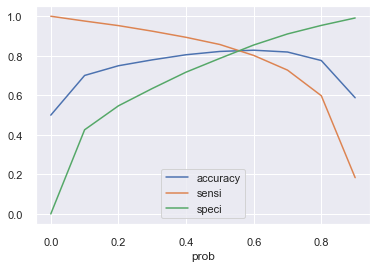

In [221]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, approximately 0.58 is the optimum point to take it as a cutoff probability.

In [222]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.58 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
11900,0,0.238796,11900,0,1,1,1,0,0,0,0,0,0,0,0
48877,1,0.703507,48877,1,1,1,1,1,1,1,1,1,0,0,1
41327,1,0.502225,41327,1,1,1,1,1,1,1,0,0,0,0,0
1811,0,0.630883,1811,1,1,1,1,1,1,1,1,0,0,0,1
10769,0,0.000059,10769,0,1,0,0,0,0,0,0,0,0,0,0


In [223]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8283226207754509

In [224]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16260,  3044],
       [ 3580, 15700]])

### Precision and recall tradeoff

In [225]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

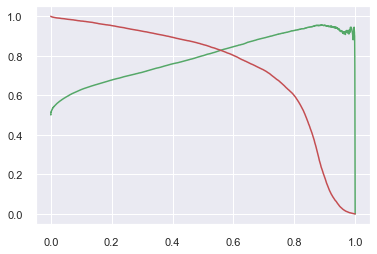

In [226]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Over all accuracy 

In [227]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8283226207754509

##### Precision
TP / TP + FP

In [228]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8376013657703798

##### Recall
TP / TP + FN

In [229]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8143153526970954

<a id=section11></a>
## 11 Feature Importance

Feature: 0, Score: -1.79701    loc_ic_mou_8
Feature: 1, Score: -0.39803    total_rech_num_8
Feature: 2, Score: -0.48791    last_day_rch_amt_8
Feature: 3, Score: -0.95360    monthly_2g_8
Feature: 4, Score: -0.61550    sachet_2g_8
Feature: 5, Score: -0.43687    monthly_3g_8
Feature: 6, Score: -0.13939    sachet_3g_8
Feature: 7, Score: -0.13658    fb_user_8
Feature: 8, Score: 0.10897    count_rech_3g_diff
Feature: 9, Score: -0.06817    last_day_rch_amt_avg_6_7
Feature: 10, Score: 0.24228    max_rech_amt_avg_6_7
Feature: 11, Score: -0.20945    monthly_2g_diff
Feature: 12, Score: 0.53682    total_rech_num_diff


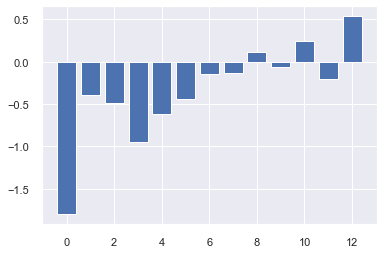

In [230]:
from matplotlib import pyplot
importance = classifier.coef_[0]
# summarize feature importance with name
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), "  " , X_test_lr.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<div class="alert alert-block alert-success">
<a id=section12></a> 
<h1>Conclusion</h1>
</div>

***

* There are **13 features** whiche were used finally for feature importance the model. Now let’s summarize and try to understand what they mean.

***
<ol>
 <strong><li>loc_ic_mou_8	</li></strong>
Minutes of usage - voice calls - Incoming calls which is showing negative number for the month of august. – So as the Incoming calls decreases in action month, there is a chance of the customer churn. 

<strong><li>total_rech_num_8</li></strong>
Total number of recharges, which is showing negative number for the month of august. – So as the total rechange trend to drop, there is a chance of the customer churn.
 
 <strong><li>last_day_rch_amt_8	</li></strong>
Amount of recharge on the last day in the month August. – So as the recharge amount trend to drop, there is a chance of the customer churn.

 <strong><li>monthly_2g_8</li></strong>
Monthly 2G is showing negative number for the month of august. – So as the monthly 2G decreases, there is a chance of the customer churn. Means customer is using 2g data less when they are about to churn.

 <strong><li>sachet_2g_8</li></strong>
Service schemes with validity smaller than a month in 2G, which is showing negative number for the month of august. – So as the small 2G scheme decreases, there is a chance of the customer churn.


 <strong><li>monthly_3g_8	</li></strong>
Monthly 3G is showing negative number for the month of august which is showing negative number. – So as the monthly 3G decreases, there is a chance of the customer churn. 
    
 <strong><li>sachet_3g_8	</li></strong>
Service schemes with validity smaller than a month for 3G, which is showing negative number for the month of august. – Means there was an decrease in the action month in consumption of small services, there is a chance of the customer churn.

 <strong><li>count_rech_3g_diff		</li></strong>
Count of 3G recharge difference shows positive number. Which means if the recharge difference increases from good phase to action phase, then there is a chance of customer churn. <br>
    
 <strong><li>last_day_rch_amt_avg_6_7 </li></strong>
Average amount of recharge on the last day in the months June and July which is showing negative number. – So as the recharge amount trend to decrease on the last day, in other words customers are waiting to recharge till last moment, there is a chance of the customer churn. 

 <strong><li>max_rech_amt_avg_6_7	</li></strong>
Average of Maximum recharge amount in a month. Here it’s the average of June and July which is showing positive number. Which means the maximum recharge amount was high in happy months and if it goes down from the happy months, there is a chance of churn. This aligns with the sachet_3g_8 behavior, means people are buying smaller pack in the last months instead of large recharge amount compared to June & July.

 <strong><li>fb_user_8		</li></strong>
Decrease in service scheme to avail facebook or other social networking sites points towards increase in Churn.

 <strong><li>monthly_2g_diff	</li></strong>
Difference in monthly 2G recharges from June and July to August. This shows a negative number. Which means if the difference is increasing i.e., people are less recharging in August, then there is a high chance of churn. 


 <strong><li>total_rech_num_diff	</li></strong>
This is the difference in total recharge number from Jun & July to August. It is showing a positive number. Which means people are recharging less in the action month, so as the difference increases there is more chances of customer Churn.

</ol>
    
***

The generic trend is showing, that for the churning customers, Maximum recharge amount is high during happy months that is June, July. It doesn’t mean that if the recharge amount increases the churn will be high. There is another factor to it also, sachet recharge decreases in action month and eventually prone to churn. Also, as we see that when customers are recharging minimum on the last day, then also trend is towards churn. So, combining these important factors we can conclude that the customers are hesitating to recharge full amount, going for small recharges, and doing the last-minute low value recharge. Business should keep an eye on such customers in the following manner:

* Is there a drop in maximum recharge amount?
* Is there a tendency in recharging lower amount on the last day?
* Is sachet recharge is decreasing?

If answer to all of the above is `“yes”`, then take some action. Give them some offers in recharge, provide some extra 2G, 3G data or provide long term lucrative plans to retain the customer for higher tenures etc.


***

